**Chapter 2 – End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

*This notebook contains all the sample code and solutions to the exercices in chapter 2.*

**Note**: You may find little differences between the code outputs in the book and in these Jupyter notebooks: these slight differences are mostly due to the random nature of many training algorithms: although I have tried to make these notebooks' outputs as constant as possible, it is impossible to guarantee that they will produce the exact same output on every platform. Also, some data structures (such as dictionaries) do not preserve the item order. Finally, I fixed a few minor bugs (I added notes next to the concerned cells) which lead to slightly different results, without changing the ideas presented in the book.

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports 
import numpy as np

#print(np.__version__) #print numpy version, e.g., 1.21.5
#to upgrade: pip install --upgrade numpy

import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "A2_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [2]:
import pandas as pd

def fetch_data(data_path):
    # Read the csv file using pandas
    data = pd.read_csv(data_path, sep=';')
    
    # Return the data
    return data

In [3]:
# Call the function to fetch the data
data_path = "MergeConflictsDataset.csv"
data = fetch_data(data_path)

print(data.columns)


Index(['commit', 'parent1', 'parent2', 'ancestor', 'is pr', 'added lines',
       'deleted lines', 'devs parent1', 'devs parent2', 'time', 'nr files',
       'added files', 'deleted files', 'renamed files', 'copied files',
       'modified files', 'nr commits1', 'nr commits2', 'density1', 'density2',
       'fix', 'bug', 'feature', 'improve', 'document', 'refactor', 'update',
       'add', 'remove', 'use', 'delete', 'change', 'messages_min',
       'messages_max', 'messages_mean', 'messages_median', 'conflict'],
      dtype='object')


In [4]:
data.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1


In [5]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26973 entries, 0 to 26972
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   commit           26973 non-null  object 
 1   parent1          26973 non-null  object 
 2   parent2          26973 non-null  object 
 3   ancestor         26972 non-null  object 
 4   is pr            26973 non-null  int64  
 5   added lines      26973 non-null  int64  
 6   deleted lines    26973 non-null  int64  
 7   devs parent1     26973 non-null  int64  
 8   devs parent2     26973 non-null  int64  
 9   time             26973 non-null  int64  
 10  nr files         26973 non-null  int64  
 11  added files      26973 non-null  int64  
 12  deleted files    26973 non-null  int64  
 13  renamed files    26973 non-null  int64  
 14  copied files     26973 non-null  int64  
 15  modified files   26973 non-null  int64  
 16  nr commits1      26973 non-null  int64  
 17  nr commits2 

In [6]:
data["commit"].value_counts()

commit
cc1b04ce986105cc04a141554902e5cb699efbcc    2
e9cdf18da174446ca4f50c4633f5c7bf37628903    2
efc0bcd1d6199448c323549fdc45310750b48c85    1
47a00864c35f3266fa098744c65496bec601977b    1
f9c6f389ac71b1354a07925785ea4738bf5ba496    1
                                           ..
d646bc5ffbdf97e3d974b40be659efdbd9a541b9    1
b07214039b4f89b4c1c8cb4242e60440d151a0bd    1
aeeceb661eed58c03b38b5176620d362ff7d22f9    1
33ec16d36ce11973ebab56834f1f81b3bf219ff7    1
542ff7fe4297d73a39664b468962ab681e4bea91    1
Name: count, Length: 26971, dtype: int64

In [7]:
data["ancestor"].value_counts()

ancestor
96344142e9064e5afd08c3c8450b38419ca3528b    67
95e0636fca782d0773375429922bc1fb3bf6b7b4    31
7bd2661d16236b6828e92917bf11a81bf8bb12d6    29
d1effecb2ef073e478c67a7ca39cf56708a66a48    21
8f3b2b281f32b9896505dad5c2b5d28a6199243c    19
                                            ..
a0214cce7487bd158b17d977f20ad9f417c7fc0a     1
b5151848b74c89720bd02a2eaf2eb302a8502c4e     1
965c923757291f23503ad8f3e523c32d4dea0484     1
682b78e54f36165cd44ab70572845775cc3d1934     1
40ebd5bf75bfec992002c2bf9fbd34df340cc78e     1
Name: count, Length: 18554, dtype: int64

In [8]:
data.describe()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
count,26973.000000,2.697300e+04,2.697300e+04,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,...,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000
mean,0.777741,4.255746e+02,2.504278e+02,4.656175,1.911801,240.714159,0.752048,2.431061,1.396545,0.970229,...,4.316205,0.955437,1.338857,0.096281,1.007860,51.391280,104.662551,69.455646,68.021095,0.054425
std,0.415772,8.887706e+03,1.027916e+04,12.230444,6.534316,908.382038,10.620490,67.840678,90.614277,64.245155,...,12.924317,3.203307,4.269666,0.541916,6.033535,34.560112,89.471017,40.057823,39.385369,0.226858
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000e+00,1.000000e+00,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,47.000000,41.000000,40.000000,0.000000
50%,1.000000,1.100000e+01,2.000000e+00,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,88.000000,66.391304,65.000000,0.000000
75%,1.000000,7.500000e+01,1.500000e+01,3.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,67.000000,131.000000,91.714286,90.000000,0.000000
max,1.000000,1.140945e+06,1.140456e+06,158.000000,182.000000,21513.000000,1152.000000,10404.000000,10396.000000,10398.000000,...,176.000000,48.000000,78.000000,16.000000,312.000000,1326.000000,1326.000000,1326.000000,1326.000000,1.000000


Saving figure attribute_histogram_plots


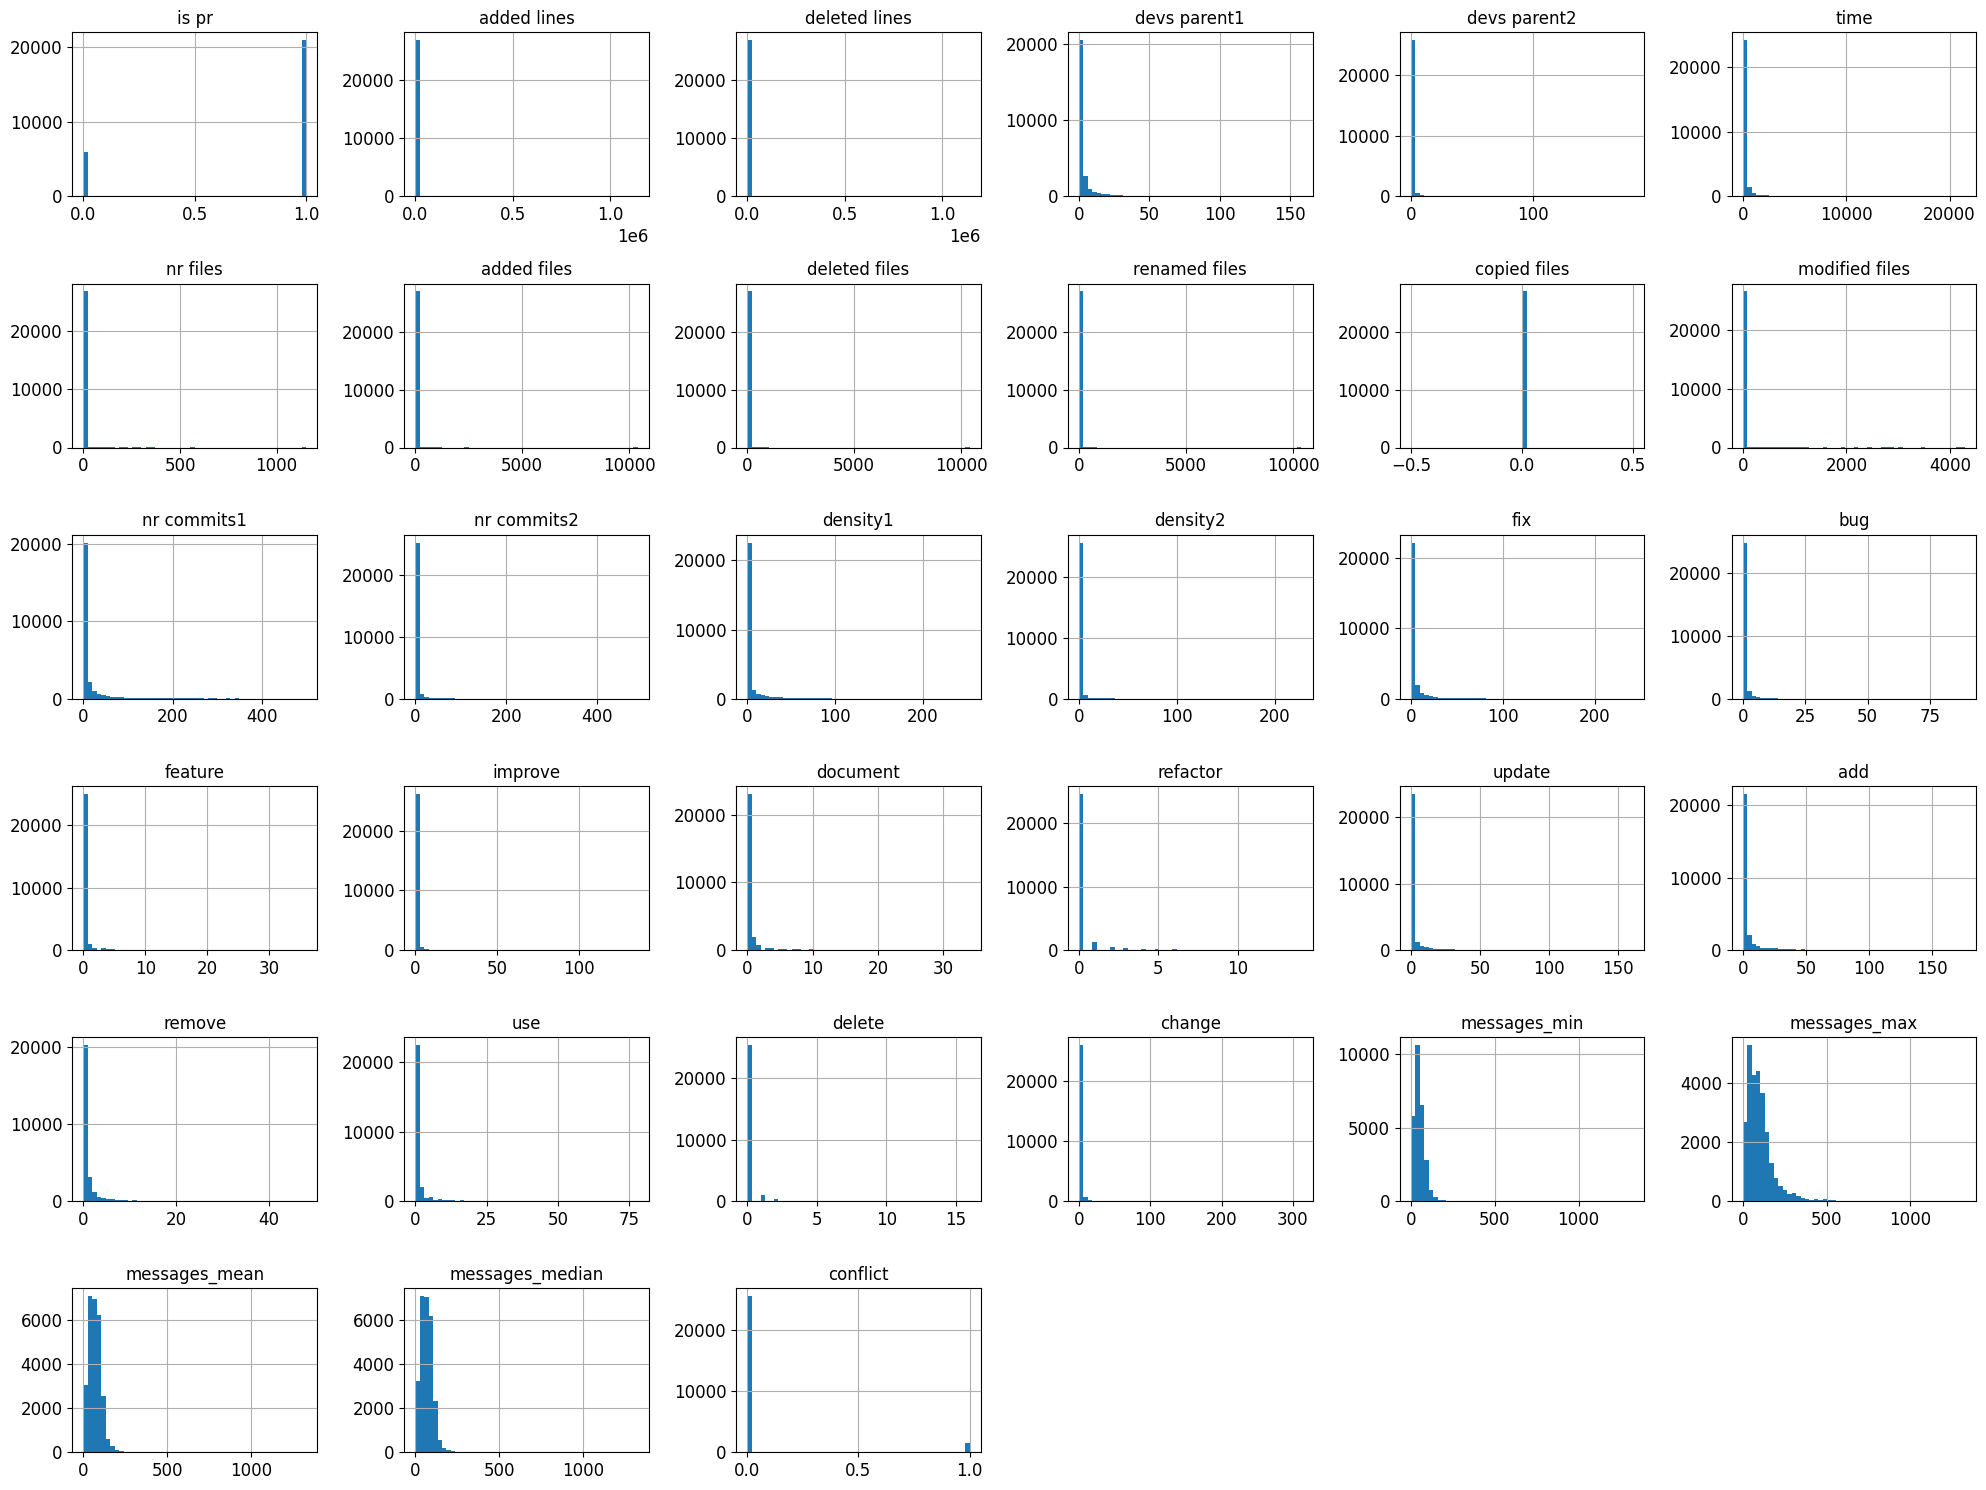

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [10]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [11]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(data, 0.2)
print(len(train_set), "train +", len(test_set), "test")

21579 train + 5394 test


In [13]:
import hashlib
import numpy as np

def test_set_check(commit, test_ratio, hash=hashlib.md5):
    # Convert commit to string before encoding
    commit_str = str(commit)
    return int(hash(commit_str.encode()).hexdigest(), 16) % (256 * 256) < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


The implementation of `test_set_check()` above works fine in both Python 2 and Python 3. In earlier releases, the following implementation was proposed, which supported any hash function, but was much slower and did not support Python 2:

If you want an implementation that supports any hash function and is compatible with both Python 2 and Python 3, here is one:

In [14]:
data_with_id = data.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")

In [15]:
data_with_id = data_with_id.drop("index", axis=1)  # Drop the added index column
data_with_id["id"] = data["commit"]
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "id")

In [16]:
test_set.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict,id
1054,731d5c0aee4a818a8aa3c2d6053652bd36d82db1,f572447ce1b7bd7e28a69b81a16ee32791557849,a343b37bc26e19f73e33a52b8a9c314ff0e73a4a,2900f3f188630b72eb3ba3915931c2711668e8aa,1,1,1,11,1,447,...,0,0,0,0,10,75,32.911111,24.0,0,731d5c0aee4a818a8aa3c2d6053652bd36d82db1
1516,e05592b52209c154eb04bcbbe625f2eabe592f9e,f08af145552fe9093d3e99ac55ce07e706cfb6b0,7adefc89ba56800134d03702a9c8657a01cd250c,59c32d3937158be4362bf954714bbbe149a59161,1,7,7,2,1,34,...,0,2,0,0,105,145,125.000000,125.0,0,e05592b52209c154eb04bcbbe625f2eabe592f9e
2855,b0460d0ce3881f15c2366e0af7bbda283aac254d,c09efd846a229b7c3fa2ea97df4f3c55fba63a82,0ab352f849dada233f287fcb27b009985a6c1fc1,c09efd846a229b7c3fa2ea97df4f3c55fba63a82,1,12,40,0,1,12,...,1,0,0,0,40,40,40.000000,40.0,0,b0460d0ce3881f15c2366e0af7bbda283aac254d
3294,76592d6f97491239127ff99e4f1f0681231b4c16,f69ce0975dace41c2fdbc5fe1814b0685d8d8664,071b8943520dd8aa3b05c2b3c6c452a81778ebae,f69ce0975dace41c2fdbc5fe1814b0685d8d8664,1,43,26,0,1,10,...,0,0,0,0,40,40,40.000000,40.0,0,76592d6f97491239127ff99e4f1f0681231b4c16
4688,ee8a2e9f04c5a43c637c8b5e9df3854a30fcf8c6,c6386cec99ffc9fba569d3d77e9f2df9044089d0,bffee2336725dde0f74933d5a7d12536c9bcbd06,c6386cec99ffc9fba569d3d77e9f2df9044089d0,1,181,134,0,1,4,...,0,0,0,0,50,50,50.000000,50.0,0,ee8a2e9f04c5a43c637c8b5e9df3854a30fcf8c6


In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_with_id, test_size=0.2, random_state=42)

In [18]:
test_set.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict,id
22959,360f06b41dd2f979113e864dcd4d083648b83801,6c1f75c688caa27d831cb053b7742b49c9f1cfef,07c76d7ec918bee30203f38d8720a0dce0f56c41,fe091ec00d2c646cffbc2e916e89c04febb24426,1,82,20,14,1,27,...,2,5,1,1,41,231,105.640244,99.0,0,360f06b41dd2f979113e864dcd4d083648b83801
22276,2d53bc41edbe78fb86e3a07c3d6690d58d8e4c4d,e013043f4084dde56070c1a3a479b9bfc78626bb,61b107da34227977ec78f214967d3958e96775b7,e013043f4084dde56070c1a3a479b9bfc78626bb,1,1,1,0,1,24,...,0,0,0,0,34,34,34.000000,34.0,0,2d53bc41edbe78fb86e3a07c3d6690d58d8e4c4d
13899,a4c7e58da520ed504650b84a7de996bf54e1c576,335bc2e390979e11708074dc3e67837299a6ccad,0d36dc60c50acb555e1aa7f6127ddb4fd4ee9040,495fdc1ff922f3239429460ac01e62e4f4a05258,1,88,15,18,1,1384,...,3,0,2,0,76,209,105.333333,112.0,0,a4c7e58da520ed504650b84a7de996bf54e1c576
9022,307f17e02e05b5070cea90dc8a07066abd40f8e2,1e6c147a751028809a9b6aa057a573311554bd9e,7b1a9d2b9978b75075d9c8f87001e16636bf70d9,1e6c147a751028809a9b6aa057a573311554bd9e,1,4,0,0,1,0,...,0,0,0,0,25,25,25.000000,25.0,0,307f17e02e05b5070cea90dc8a07066abd40f8e2
13494,541c305f8571f4d2ebae81f8a47ce938d80dd203,7346270f0309f3689a07ef9854b25e9c233c43e5,faaa462e8a0ea17129a93337b2a6183f583e4b44,7346270f0309f3689a07ef9854b25e9c233c43e5,1,1,0,0,1,99,...,0,0,0,0,9,9,9.000000,9.0,0,541c305f8571f4d2ebae81f8a47ce938d80dd203


Create new column "mean_density" which may be helpful. This will be tested later.

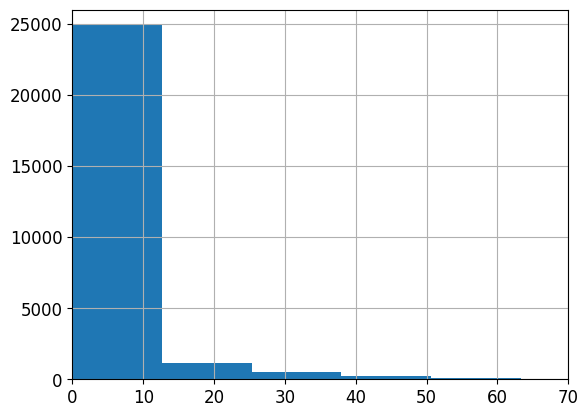

In [19]:
data_with_id["mean_density"] = (data["density1"] + data["density2"])/2
data_with_id["mean_density"].hist()
plt.xlim(0, 70)
plt.ylim(0, 26000)
plt.show()

Below, I will implement a "Feature importances with a forest of trees" algorithm, and the result gives "nr files"as the most important feature.

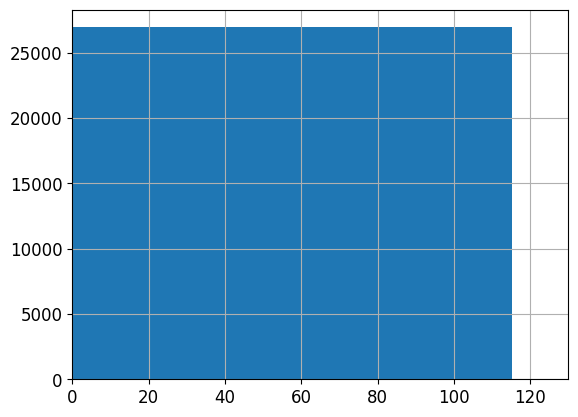

In [20]:
data_with_id["nr files"].hist()
plt.xlim(0, 130)

plt.show()

**Warning**: in the book, I did not use `pd.cut()`, instead I used the code below. The `pd.cut()` solution gives the same result (except the labels are integers instead of floats), but it is simpler to understand:

```python
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
```

In [21]:
print(data_with_id["mean_density"].describe())
print(data_with_id["mean_density"].head())

bins = [0., 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, np.inf]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

data_with_id["mean_density"] = pd.cut(data_with_id["mean_density"], bins=bins, labels=labels)

print(data_with_id["mean_density"].describe())


count    26973.000000
mean         3.150595
std          8.141458
min          0.000000
25%          0.000000
50%          0.500000
75%          2.000000
max        126.500000
Name: mean_density, dtype: float64
0    0.0
1    7.5
2    0.0
3    1.5
4    0.0
Name: mean_density, dtype: float64
count     13561
unique       15
top           1
freq       9633
Name: mean_density, dtype: int64


In [22]:
print(data["nr files"].describe())
data_with_id["nr_files_cat"] = pd.cut(data["nr files"],
                               bins=[0., 0.5, 1.5, 2.5, 3.0, 5.0, 10.0, 15.0, 20.0, np.inf],
                               labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])

count    26973.000000
mean         0.752048
std         10.620490
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1152.000000
Name: nr files, dtype: float64


In [23]:
data_with_id["mean_density"].value_counts()

mean_density
1     9633
2     1514
3      756
4      498
5      326
6      245
7      189
8      122
9       72
10      58
11      39
12      33
13      33
15      32
14      11
Name: count, dtype: int64

In [24]:
data_with_id["nr_files_cat"].value_counts()

nr_files_cat
2    4046
3     720
4     227
5     218
6     209
9     109
7      83
8      30
1       0
Name: count, dtype: int64

<Axes: >

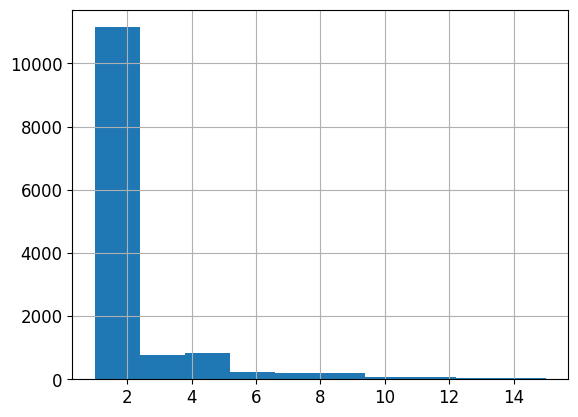

In [25]:
data_with_id["mean_density"].hist()

<Axes: >

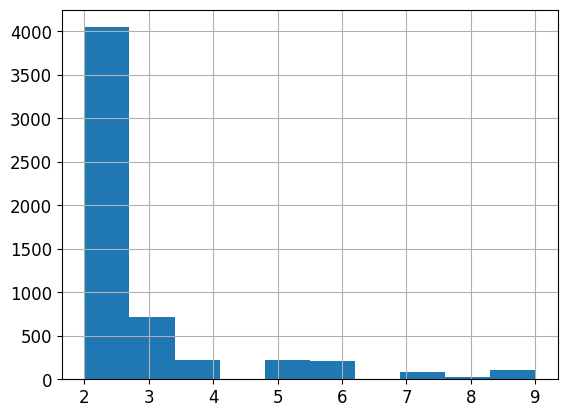

In [26]:
data_with_id["nr_files_cat"].hist()

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in data_with_id.columns:
    # Compare if the dtype is object
    if data_with_id[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        data_with_id[col]=le.fit_transform(data_with_id[col])

# import pandas as pd

# # Iterate over all the values of each column and extract their dtypes
# for col in data_with_id.columns:
#     # Compare if the dtype is object
#     if data_with_id[col].dtype == 'object':
#         # Use pandas get_dummies to one-hot encode the column
#         one_hot_encoded = pd.get_dummies(data_with_id[col], prefix=col)
#         # Drop the original column
#         data_with_id = data_with_id.drop(col, axis=1)
#         # Concatenate the one-hot encoded columns
#         data_with_id = pd.concat([data_with_id, one_hot_encoded], axis=1)


Feature importances with a forest of trees

In [28]:
from sklearn.ensemble import RandomForestClassifier
X = data_with_id.drop('conflict', axis=1).values
y = data_with_id['conflict'].values

# Split, scale, and train with stratified split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

# Get column names
column_names = data_with_id.drop('conflict', axis=1).columns

# Create a dictionary mapping feature indices to column names
feature_dict = {f"feature {i}": name for i, name in enumerate(column_names)}

# Print the dictionary
for feature, name in feature_dict.items():
    print(f"{feature}: {name}")

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split

# # Drop rows with missing values
# data_cleaned = data_with_id.dropna()

# # Take a subset of the cleaned data
# subset_size = 2500  # Adjust the size according to your memory constraints
# subset = data_cleaned.sample(n=subset_size, random_state=42)

# # Define features (X) and target (y)
# X = subset.drop('conflict', axis=1)
# y = subset['conflict']

# # Split the subset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Apply PCA on the subset
# pca = PCA(n_components=50)  # Adjust n_components as needed
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

# # Initialize RandomForestClassifier
# feature_names = [f"feature {i}" for i in range(X_train_pca.shape[1])]
# forest = RandomForestClassifier(random_state=0)

# # Train the model using PCA-transformed data
# forest.fit(X_train_pca, y_train)

# # Print the explained variance ratio of the selected components
# print("Explained variance ratio of selected components:", pca.explained_variance_ratio_)

# # Get column names
# column_names = data_with_id.drop('conflict', axis=1).columns

# # Create a dictionary mapping feature indices to column names
# feature_dict = {f"feature {i}": name for i, name in enumerate(column_names[:38])}

# # Print the dictionary
# for feature, name in feature_dict.items():
#     print(f"{feature}: {name}")



feature 0: commit
feature 1: parent1
feature 2: parent2
feature 3: ancestor
feature 4: is pr
feature 5: added lines
feature 6: deleted lines
feature 7: devs parent1
feature 8: devs parent2
feature 9: time
feature 10: nr files
feature 11: added files
feature 12: deleted files
feature 13: renamed files
feature 14: copied files
feature 15: modified files
feature 16: nr commits1
feature 17: nr commits2
feature 18: density1
feature 19: density2
feature 20: fix
feature 21: bug
feature 22: feature
feature 23: improve
feature 24: document
feature 25: refactor
feature 26: update
feature 27: add
feature 28: remove
feature 29: use
feature 30: delete
feature 31: change
feature 32: messages_min
feature 33: messages_max
feature 34: messages_mean
feature 35: messages_median
feature 36: id
feature 37: mean_density
feature 38: nr_files_cat


In [29]:
import time
from sklearn.ensemble import RandomForestClassifier
import numpy as np

forest = RandomForestClassifier(n_estimators=100)
start_time = time.time()
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 3.408 seconds


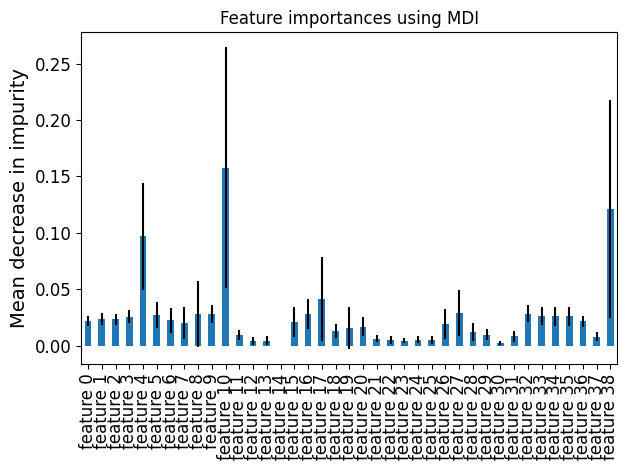

In [30]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Feature 10: 'nr files';
Feature 38: 'nr_files_cat';
Feature 4: 'is pr';

In [31]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 11.419 seconds


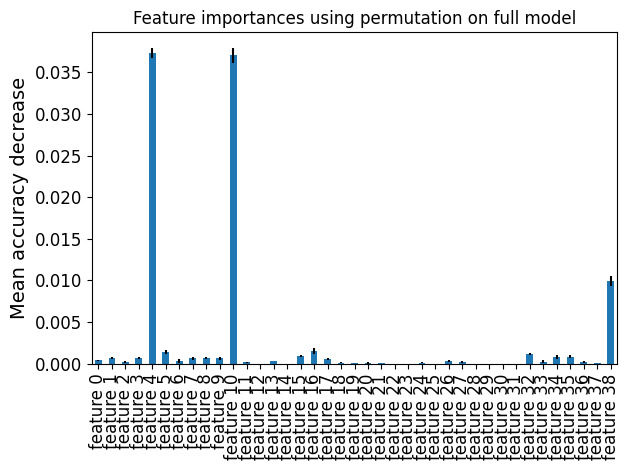

In [32]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
data_with_id.dropna(subset=["nr_files_cat"], inplace=True)
data_with_id.reset_index(drop=True, inplace=True)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=34)
for train_index, test_index in split.split(data_with_id, data_with_id["nr_files_cat"]):
    strat_train_set = data_with_id.loc[train_index]
    strat_test_set = data_with_id.loc[test_index]

In [34]:
strat_test_set["nr_files_cat"].value_counts() / len(strat_test_set)

nr_files_cat
2    0.717449
3    0.127547
4    0.039858
5    0.038973
6    0.037201
9    0.019486
7    0.014172
8    0.005314
1    0.000000
Name: count, dtype: float64

In [35]:
data_with_id["nr_files_cat"].value_counts() / len(data_with_id)

nr_files_cat
2    0.717122
3    0.127614
4    0.040234
5    0.038639
6    0.037044
9    0.019319
7    0.014711
8    0.005317
1    0.000000
Name: count, dtype: float64

In [36]:
def nr_files_cat_proportions(new_data):
    return new_data["nr_files_cat"].value_counts() / len(new_data)

train_set, test_set = train_test_split(data_with_id, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": nr_files_cat_proportions(data_with_id),
    "Stratified": nr_files_cat_proportions(strat_test_set),
    "Random": nr_files_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [37]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
nr_files_cat,,,,,
1,0.000000,0.000000,0.000000,NaN,NaN
2,0.717122,0.717449,0.720992,0.539719,0.045666
3,0.127614,0.127547,0.125775,-1.441295,-0.053144
4,0.040234,0.039858,0.039858,-0.933733,-0.933733
5,0.038639,0.038973,0.038973,0.863799,0.863799
6,0.037044,0.037201,0.033658,-9.139222,0.425070
7,0.014711,0.014172,0.015058,2.355214,-3.665681
8,0.005317,0.005314,0.004429,-16.710954,-0.053144
9,0.019319,0.019486,0.021258,10.033236,0.863799


In [38]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("nr_files_cat", axis=1, inplace=True)

# Discover and visualize the data to gain insights

In [39]:
new_data = strat_train_set.copy()

Saving figure bad_visualization_plot


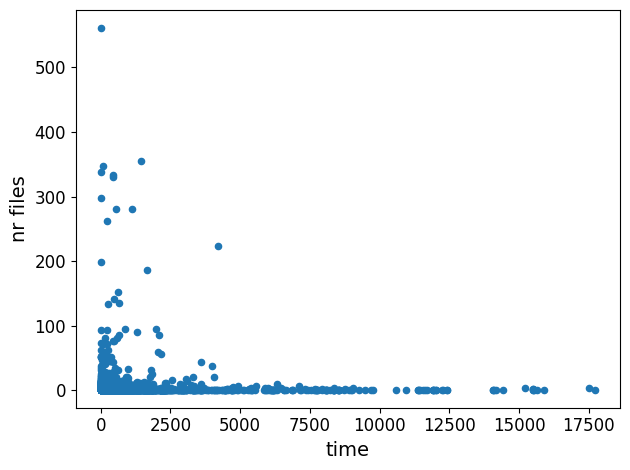

In [40]:
new_data.plot(kind="scatter", x="time", y="nr files")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


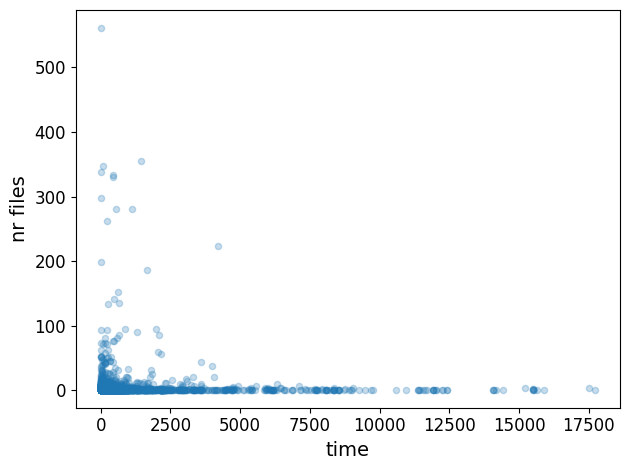

In [41]:
new_data.plot(kind="scatter", x="time", y="nr files", alpha=0.25)
save_fig("better_visualization_plot")

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611). Thanks to Wilmer Arellano for pointing it out.

In [42]:
new_data["nr_commits_avg"] = (new_data["nr commits1"] + new_data["nr commits2"])/2

Saving figure nr_commits_avg_scatterplot


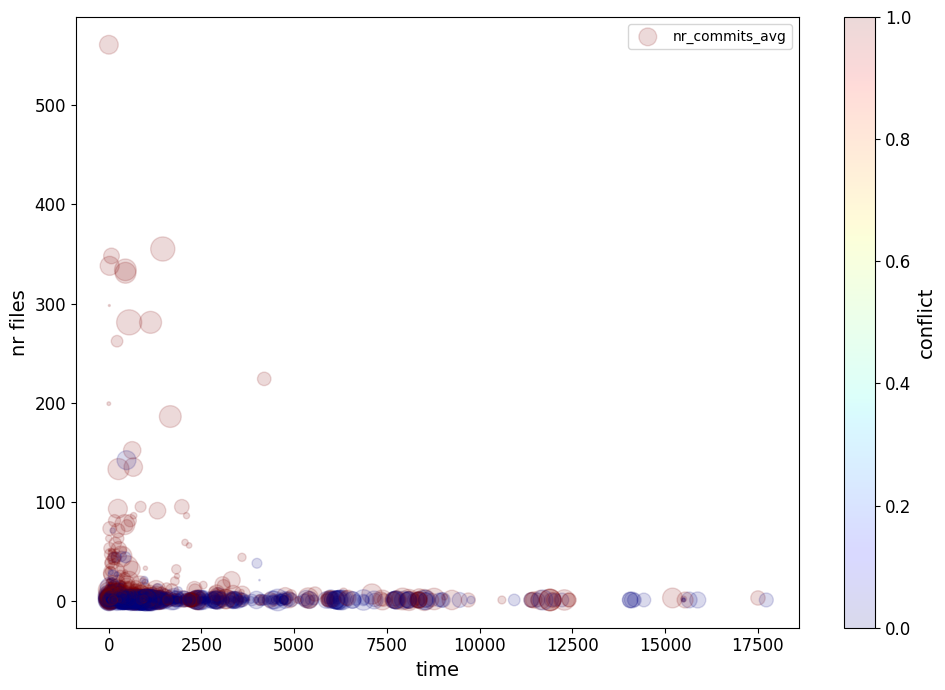

In [43]:
new_data.plot(kind="scatter", x="time", y="nr files", alpha=0.15,
    s=new_data["nr_commits_avg"], label="nr_commits_avg", figsize=(10,7),
    c="conflict", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("nr_commits_avg_scatterplot")

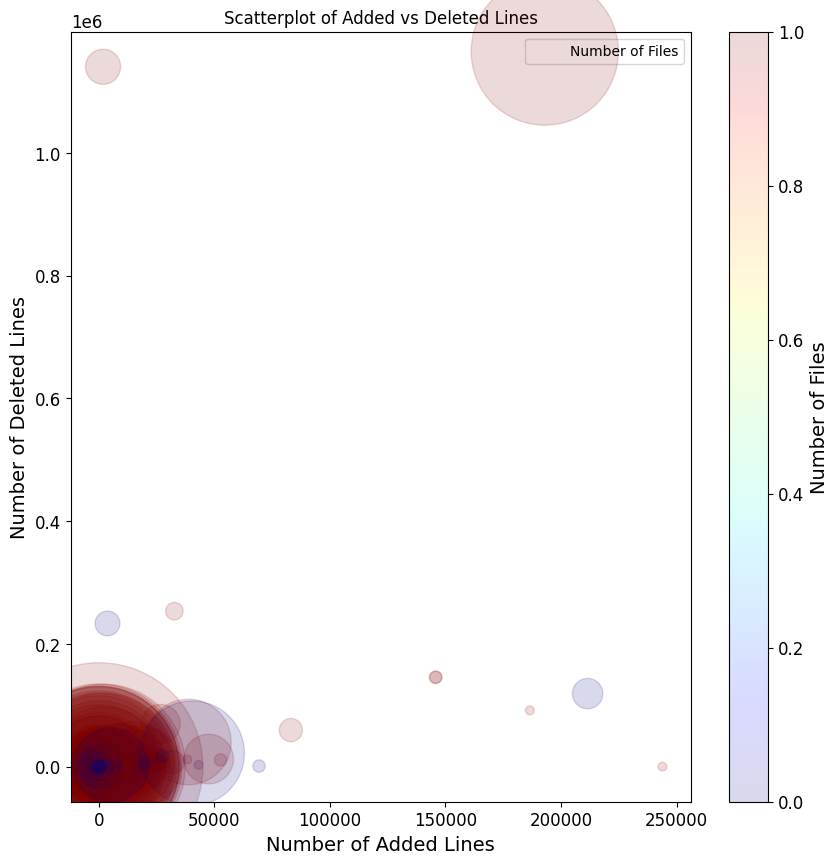

In [44]:
# Create a scatterplot
plt.figure(figsize=(10, 10))
scatter = plt.scatter(new_data["added lines"], new_data["deleted lines"], alpha=0.15,
                      s=new_data["nr files"] * 40, label="Number of Files",
                      c=new_data["conflict"], cmap=plt.get_cmap("jet"))

# Add labels and legend
plt.xlabel("Number of Added Lines")
plt.ylabel("Number of Deleted Lines")
plt.title("Scatterplot of Added vs Deleted Lines")
plt.legend()

# Add colorbar
plt.colorbar(scatter, label="Number of Files")

# Show the plot
plt.show()

In [45]:
corr_matrix = new_data.corr()
print(corr_matrix)


                   commit   parent1   parent2  ancestor     is pr  \
commit           1.000000  0.004800 -0.004002  0.018533 -0.006875   
parent1          0.004800  1.000000 -0.002390  0.003727 -0.012279   
parent2         -0.004002 -0.002390  1.000000 -0.003194  0.005637   
ancestor         0.018533  0.003727 -0.003194  1.000000  0.014996   
is pr           -0.006875 -0.012279  0.005637  0.014996  1.000000   
added lines     -0.010549 -0.004178 -0.001442 -0.004756 -0.100098   
deleted lines   -0.028024 -0.009815 -0.018989 -0.004544 -0.038058   
devs parent1    -0.025037 -0.008754  0.013376  0.003363  0.125714   
devs parent2     0.011934 -0.017587 -0.012256  0.014727 -0.203385   
time            -0.002132 -0.013671  0.015800  0.051447  0.004851   
nr files         0.024781  0.008372 -0.003966  0.014597 -0.085051   
added files     -0.006152 -0.019684  0.002047 -0.039402 -0.110394   
deleted files   -0.028001 -0.009306 -0.020641 -0.011249 -0.022945   
renamed files    0.002363 -0.02486

In [46]:
# Select only numeric columns
numeric_cols = new_data.select_dtypes(include=[np.number])

# Compute correlation of 'messages_median' with all other numeric columns
corr_series = numeric_cols.corrwith(new_data['conflict'])

# Sort the correlation series
sorted_corr = corr_series.sort_values(ascending=False)

print(sorted_corr)

conflict           1.000000
nr commits2        0.317107
devs parent2       0.259084
density2           0.229355
nr files           0.173468
nr_commits_avg     0.149153
refactor           0.139635
add                0.128998
remove             0.109218
added files        0.103290
added lines        0.103241
modified files     0.100465
update             0.087908
change             0.085614
feature            0.083659
time               0.071770
fix                0.070354
messages_max       0.061547
use                0.052695
bug                0.049352
delete             0.048848
deleted lines      0.046640
deleted files      0.033397
document           0.031446
improve            0.031201
renamed files      0.029316
parent2            0.014562
commit             0.013176
id                 0.013176
parent1            0.001630
ancestor           0.000303
nr commits1       -0.001776
devs parent1      -0.066931
messages_mean     -0.079112
density1          -0.102159
messages_median   -0

c:\Users\Cipleu\Documents\IULIA\SCOALA\facultate\Year 3 Semester 2\IS\Lab\A_2\.venv\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Cipleu\Documents\IULIA\SCOALA\facultate\Year 3 Semester 2\IS\Lab\A_2\.venv\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Now I select the first 5 attributes from the corr_matrix.

Saving figure scatter_matrix_plot


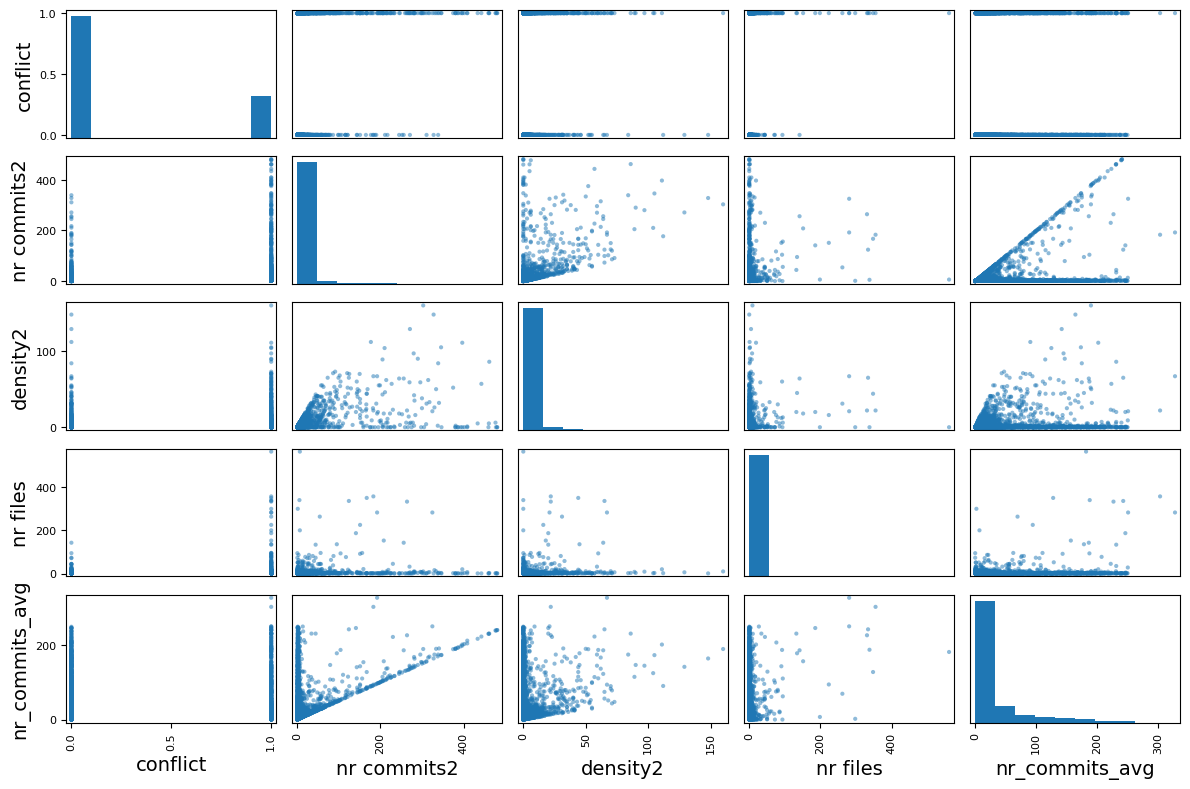

In [47]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["conflict", "nr commits2",
              "density2", "nr files", "nr_commits_avg"]
scatter_matrix(new_data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")


Saving figure nr_commits2_vs_conflict_scatterplot


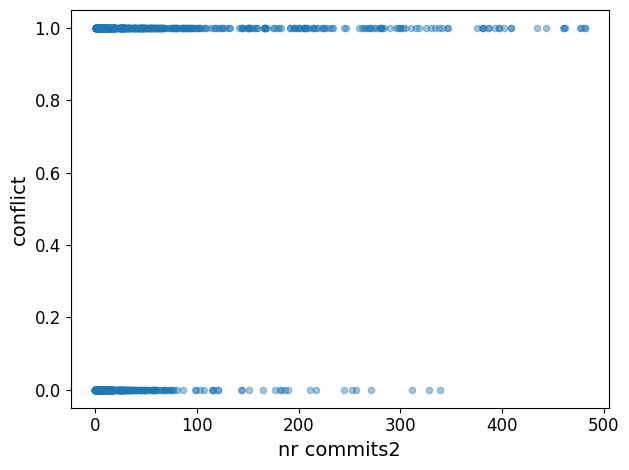

In [48]:
new_data.plot(kind="scatter", x="nr commits2", y="conflict",
             alpha=0.4)
save_fig("nr_commits2_vs_conflict_scatterplot")
plt.show()

Here I tried multiple combinations of features to create new ones. The choosing criteria was based on the corr_matrix values, more precise those with absolute values close to 0.

In [49]:
new_data["nr_commits1_per_total"] = new_data["nr commits1"]/(new_data["nr commits1"] + new_data["nr commits2"])
new_data["nr_commits1_per_nr_commits2"] = new_data["nr commits1"]/new_data["nr commits2"]
new_data["deleted_files_per_total"] = new_data["deleted files"]/new_data["nr files"]
new_data["deleted_lines_per_added_lines"] = new_data["deleted lines"]/new_data["added lines"]
new_data["renamed_files_per_total"] = new_data["renamed files"]/new_data["nr files"]
new_data["messages_max_per_messages_mean"] = new_data["messages_max"]/new_data["messages_mean"]
new_data["messages_max_per_messages_median"] = new_data["messages_max"]/new_data["messages_median"]
new_data["messages_median_per_messages_mean"] = new_data["messages_median"]/new_data["messages_mean"]
new_data["fix_per_change"] = new_data["fix"]/new_data["change"]
new_data["bug_per_fix"] = new_data["bug"]/new_data["fix"]
new_data["bug_per_nr_files"] = new_data["bug"]/new_data["nr files"]

Note: there was a bug in the previous cell, in the definition of the `rooms_per_household` attribute. This explains why the correlation value below differs slightly from the value in the book (unless you are reading the latest version).

In [50]:
corr_matrix = new_data.corr()
corr_matrix["conflict"].sort_values(ascending=False)


conflict                             1.000000
nr commits2                          0.317107
devs parent2                         0.259084
density2                             0.229355
nr files                             0.173468
messages_max_per_messages_median     0.159642
nr_commits_avg                       0.149153
messages_max_per_messages_mean       0.140002
refactor                             0.139635
add                                  0.128998
remove                               0.109218
added files                          0.103290
added lines                          0.103241
modified files                       0.100465
update                               0.087908
change                               0.085614
feature                              0.083659
time                                 0.071770
fix                                  0.070354
messages_max                         0.061547
deleted_files_per_total              0.058663
fix_per_change                    

We can see that some of those new columns give pretty good values ('messages_mean_per_messages_median'), while other do not ('nr_commits1_per_total').

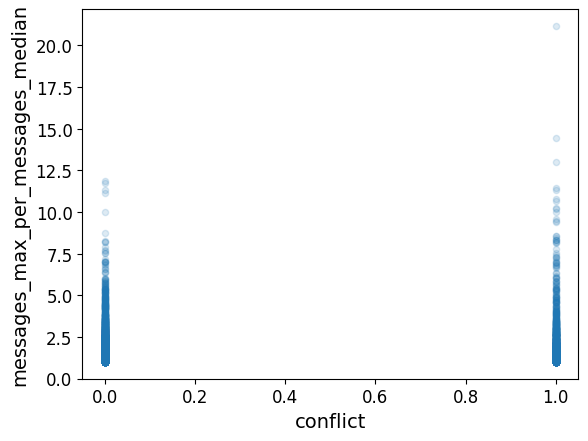

In [51]:
new_data.plot(kind="scatter", y="messages_max_per_messages_median", x="conflict",
             alpha=0.15)
plt.show()

In [52]:
new_data.describe()

c:\Users\Cipleu\Documents\IULIA\SCOALA\facultate\Year 3 Semester 2\IS\Lab\A_2\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Cipleu\Documents\IULIA\SCOALA\facultate\Year 3 Semester 2\IS\Lab\A_2\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Cipleu\Documents\IULIA\SCOALA\facultate\Year 3 Semester 2\IS\Lab\A_2\.venv\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\Cipleu\Documents\IULIA\SCOALA\facultate\Year 3 Semester 2\IS\Lab\A_2\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,nr_commits1_per_nr_commits2,deleted_files_per_total,deleted_lines_per_added_lines,renamed_files_per_total,messages_max_per_messages_mean,messages_max_per_messages_median,messages_median_per_messages_mean,fix_per_change,bug_per_fix,bug_per_nr_files
count,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4.513000e+03,4513.000000,4513.000000,4513.000000,...,4492.000000,4513.000000,4206.000000,4513.000000,4492.000000,4492.000000,4492.000000,3251.000000,3194.000,4513.000000
mean,13366.074230,13281.879903,13483.396410,9410.124308,0.499446,815.300687,7.277496e+02,11.226678,3.911589,610.532019,...,34.926586,0.621349,inf,1.596747,1.838270,1.970315,0.966172,inf,inf,0.785402
std,7739.305417,7652.753723,7792.634889,5356.004348,0.500055,7073.086061,1.822475e+04,20.889162,13.390478,1629.390258,...,75.426599,11.508632,NaN,77.549036,0.947963,1.237598,0.089293,NaN,NaN,2.401365
min,11.000000,4.000000,1.000000,18.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,...,0.002079,0.000000,0.000000,0.000000,1.000000,1.000000,0.321252,0.000000,0.000,0.000000
25%,6701.000000,6569.000000,6541.000000,4693.000000,0.000000,1.000000,0.000000e+00,1.000000,1.000000,25.000000,...,1.000000,0.000000,0.000000,0.000000,1.266374,1.244785,0.935172,3.428571,0.000,0.000000
50%,13195.000000,13297.000000,13635.000000,9731.000000,0.000000,16.000000,2.000000e+00,3.000000,1.000000,120.000000,...,5.000000,0.000000,0.271672,0.000000,1.559025,1.606383,0.989466,12.750000,0.000,0.000000
75%,20044.000000,20075.000000,20185.000000,14034.000000,1.000000,126.000000,2.900000e+01,9.000000,2.000000,427.000000,...,25.500000,0.000000,0.899950,0.000000,2.082688,2.217045,1.006306,NaN,0.125,0.500000
max,26970.000000,26465.000000,26721.000000,18554.000000,1.000000,243899.000000,1.140456e+06,158.000000,182.000000,17733.000000,...,499.000000,649.750000,inf,5199.000000,10.521332,21.166667,1.355769,inf,inf,43.000000


# Prepare the data for Machine Learning algorithms

In [53]:
new_data = strat_train_set.drop("conflict", axis=1) # drop labels for training set
new_data_labels = strat_train_set["conflict"].copy()
print(new_data.columns)

Index(['commit', 'parent1', 'parent2', 'ancestor', 'is pr', 'added lines',
       'deleted lines', 'devs parent1', 'devs parent2', 'time', 'nr files',
       'added files', 'deleted files', 'renamed files', 'copied files',
       'modified files', 'nr commits1', 'nr commits2', 'density1', 'density2',
       'fix', 'bug', 'feature', 'improve', 'document', 'refactor', 'update',
       'add', 'remove', 'use', 'delete', 'change', 'messages_min',
       'messages_max', 'messages_mean', 'messages_median', 'id',
       'mean_density'],
      dtype='object')


In [54]:
sample_incomplete_rows = new_data[new_data.isnull().any(axis=1)].head()
sample_incomplete_rows

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,id,mean_density
3676,6944,1839,12093,12986,0,74,74,9,3,1267,...,0,0,0,1,47,120,74.371429,81.0,6944,NaN
1156,6779,20383,20016,15984,0,5251,1713,1,1,3,...,11,0,1,4,26,82,48.229885,49.0,6779,NaN
1712,26722,23362,4237,5446,0,125,9,1,1,20,...,0,0,0,0,42,42,42.000000,42.0,26722,NaN
877,33,25667,175,3093,1,10,3,1,1,15,...,0,0,0,0,76,76,76.000000,76.0,33,NaN
2220,25030,697,20175,702,1,1,0,22,1,736,...,8,0,0,7,50,131,70.924242,68.0,25030,NaN


In [55]:
print(sample_incomplete_rows.columns)

sample_incomplete_rows.dropna(subset=["mean_density"])    # option 1

Index(['commit', 'parent1', 'parent2', 'ancestor', 'is pr', 'added lines',
       'deleted lines', 'devs parent1', 'devs parent2', 'time', 'nr files',
       'added files', 'deleted files', 'renamed files', 'copied files',
       'modified files', 'nr commits1', 'nr commits2', 'density1', 'density2',
       'fix', 'bug', 'feature', 'improve', 'document', 'refactor', 'update',
       'add', 'remove', 'use', 'delete', 'change', 'messages_min',
       'messages_max', 'messages_mean', 'messages_median', 'id',
       'mean_density'],
      dtype='object')


,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,id,mean_density


In [56]:
sample_incomplete_rows.drop("mean_density", axis=1)       # option 2

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,id
3676,6944,1839,12093,12986,0,74,74,9,3,1267,...,1,0,0,0,1,47,120,74.371429,81.0,6944
1156,6779,20383,20016,15984,0,5251,1713,1,1,3,...,15,11,0,1,4,26,82,48.229885,49.0,6779
1712,26722,23362,4237,5446,0,125,9,1,1,20,...,0,0,0,0,0,42,42,42.000000,42.0,26722
877,33,25667,175,3093,1,10,3,1,1,15,...,0,0,0,0,0,76,76,76.000000,76.0,33
2220,25030,697,20175,702,1,1,0,22,1,736,...,22,8,0,0,7,50,131,70.924242,68.0,25030


In [57]:
new_data["mean_density"] = new_data["mean_density"].astype(float)  # Convert to float
median = new_data["mean_density"].median()  # Calculate the median
sample_incomplete_rows["mean_density"].fillna(median, inplace=True)  # Fill NaN values with the median
sample_incomplete_rows

C:\Users\Cipleu\AppData\Local\Temp\ipykernel_32840\3044403139.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_incomplete_rows["mean_density"].fillna(median, inplace=True)  # Fill NaN values with the median


,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,id,mean_density
3676,6944,1839,12093,12986,0,74,74,9,3,1267,...,0,0,0,1,47,120,74.371429,81.0,6944,1
1156,6779,20383,20016,15984,0,5251,1713,1,1,3,...,11,0,1,4,26,82,48.229885,49.0,6779,1
1712,26722,23362,4237,5446,0,125,9,1,1,20,...,0,0,0,0,42,42,42.000000,42.0,26722,1
877,33,25667,175,3093,1,10,3,1,1,15,...,0,0,0,0,76,76,76.000000,76.0,33,1
2220,25030,697,20175,702,1,1,0,22,1,736,...,8,0,0,7,50,131,70.924242,68.0,25030,1


**Warning**: Since Scikit-Learn 0.20, the `sklearn.preprocessing.Imputer` class was replaced by the `sklearn.impute.SimpleImputer` class.

In [58]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [59]:
categorical_columns = new_data.select_dtypes(include=['category']).columns
print("Categorical columns:")
for column in categorical_columns:
    print(column)
new_data_num = new_data.drop('mean_density', axis=1)

# Print column types
print("Column types:")
print(new_data_num.dtypes)

# Drop categorical columns
new_data_num = new_data_num.select_dtypes(exclude=['category'])

# Print remaining columns
print("Remaining columns:")
print(new_data_num.columns)

# Compute the median
median_values = new_data_num.median().values
print("Median values:")
print(median_values)

Categorical columns:
Column types:
commit               int32
parent1              int32
parent2              int32
ancestor             int32
is pr                int64
added lines          int64
deleted lines        int64
devs parent1         int64
devs parent2         int64
time                 int64
nr files             int64
added files          int64
deleted files        int64
renamed files        int64
copied files         int64
modified files       int64
nr commits1          int64
nr commits2          int64
density1             int64
density2             int64
fix                  int64
bug                  int64
feature              int64
improve              int64
document             int64
refactor             int64
update               int64
add                  int64
remove               int64
use                  int64
delete               int64
change               int64
messages_min         int64
messages_max         int64
messages_mean      float64
messages_median    f

In [60]:
imputer.fit(new_data_num)

SimpleImputer(strategy='median')

In [61]:
imputer.statistics_

array([1.31950000e+04, 1.32970000e+04, 1.36350000e+04, 9.73100000e+03,
       0.00000000e+00, 1.60000000e+01, 2.00000000e+00, 3.00000000e+00,
       1.00000000e+00, 1.20000000e+02, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       1.10000000e+01, 2.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.40000000e+01, 1.20000000e+02, 7.69210526e+01, 7.55000000e+01,
       1.31950000e+04])

Check that this is the same as manually computing the median of each attribute:

In [62]:
new_data_num.median().values

array([1.31950000e+04, 1.32970000e+04, 1.36350000e+04, 9.73100000e+03,
       0.00000000e+00, 1.60000000e+01, 2.00000000e+00, 3.00000000e+00,
       1.00000000e+00, 1.20000000e+02, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       1.10000000e+01, 2.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.40000000e+01, 1.20000000e+02, 7.69210526e+01, 7.55000000e+01,
       1.31950000e+04])

Transform the training set:

In [63]:
X = imputer.transform(new_data_num)

In [64]:
new_data_tr = pd.DataFrame(X, columns=new_data_num.columns,
                          index = list(new_data.index.values))

In [65]:
new_data_tr.loc[sample_incomplete_rows.index.values]

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,id
3676,6944.0,1839.0,12093.0,12986.0,0.0,74.0,74.0,9.0,3.0,1267.0,...,1.0,0.0,0.0,0.0,1.0,47.0,120.0,74.371429,81.0,6944.0
1156,6779.0,20383.0,20016.0,15984.0,0.0,5251.0,1713.0,1.0,1.0,3.0,...,15.0,11.0,0.0,1.0,4.0,26.0,82.0,48.229885,49.0,6779.0
1712,26722.0,23362.0,4237.0,5446.0,0.0,125.0,9.0,1.0,1.0,20.0,...,0.0,0.0,0.0,0.0,0.0,42.0,42.0,42.000000,42.0,26722.0
877,33.0,25667.0,175.0,3093.0,1.0,10.0,3.0,1.0,1.0,15.0,...,0.0,0.0,0.0,0.0,0.0,76.0,76.0,76.000000,76.0,33.0
2220,25030.0,697.0,20175.0,702.0,1.0,1.0,0.0,22.0,1.0,736.0,...,22.0,8.0,0.0,0.0,7.0,50.0,131.0,70.924242,68.0,25030.0


In [66]:
imputer.strategy

'median'

In [67]:
new_data_tr = pd.DataFrame(X, columns=new_data_num.columns)
new_data_tr.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,id
0,4585.0,7625.0,12029.0,8805.0,0.0,1653.0,638.0,1.0,10.0,495.0,...,25.0,8.0,6.0,0.0,2.0,50.0,140.0,81.738255,80.0,4585.0
1,17577.0,22515.0,17969.0,6716.0,1.0,12.0,4.0,4.0,1.0,20.0,...,0.0,0.0,0.0,0.0,0.0,40.0,77.0,61.142857,67.0,17577.0
2,8322.0,3844.0,23323.0,9874.0,0.0,69.0,0.0,9.0,1.0,206.0,...,9.0,3.0,4.0,0.0,2.0,24.0,151.0,72.442177,67.5,8322.0
3,3387.0,13161.0,2346.0,10673.0,0.0,70.0,4.0,13.0,2.0,42.0,...,9.0,0.0,1.0,0.0,1.0,31.0,156.0,82.500000,75.0,3387.0
4,18061.0,8879.0,17106.0,13654.0,0.0,2.0,1.0,2.0,3.0,71.0,...,8.0,4.0,1.0,0.0,0.0,33.0,117.0,68.670270,64.0,18061.0


Now let's preprocess the categorical input feature, `mean_density`:

In [68]:
new_data_cat = new_data[['mean_density']]
new_data_cat.head(10)

,mean_density
3171,5.0
3995,1.0
3098,3.0
4803,2.0
2397,1.0
3676,NaN
1162,2.0
1156,NaN
1390,1.0
1712,NaN


**Warning**: earlier versions of the book used the `LabelEncoder` class or Pandas' `Series.factorize()` method to encode string categorical attributes as integers. However, the `OrdinalEncoder` class that was introduced in Scikit-Learn 0.20 (see [PR #10521](https://github.com/scikit-learn/scikit-learn/issues/10521)) is preferable since it is designed for input features (`X` instead of labels `y`) and it plays well with pipelines (introduced later in this notebook). If you are using an older version of Scikit-Learn (<0.20), then you can import it from `future_encoders.py` instead.

In [69]:
# try:
from sklearn.preprocessing import OrdinalEncoder
# except ImportError:
#     from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [70]:
ordinal_encoder = OrdinalEncoder()
new_data_cat_encoded = ordinal_encoder.fit_transform(new_data_cat)
new_data_cat_encoded[:10]

array([[ 4.],
       [ 0.],
       [ 2.],
       [ 1.],
       [ 0.],
       [nan],
       [ 1.],
       [nan],
       [ 0.],
       [nan]])

In [71]:
ordinal_encoder.categories_

[array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., nan])]

**Warning**: earlier versions of the book used the `LabelBinarizer` or `CategoricalEncoder` classes to convert each categorical value to a one-hot vector. It is now preferable to use the `OneHotEncoder` class. Since Scikit-Learn 0.20 it can handle string categorical inputs (see [PR #10521](https://github.com/scikit-learn/scikit-learn/issues/10521)), not just integer categorical inputs. If you are using an older version of Scikit-Learn, you can import the new version from `future_encoders.py`:

In [72]:
# try:
from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
from sklearn.preprocessing import OneHotEncoder
# except ImportError:
#     from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
new_data_cat_1hot = cat_encoder.fit_transform(new_data_cat)
new_data_cat_1hot

<4513x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4513 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [73]:
new_data_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [74]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
new_data_cat_1hot = cat_encoder.fit_transform(new_data_cat)

# To convert to a dense array if needed
new_data_cat_1hot_dense = new_data_cat_1hot.toarray()


In [75]:
cat_encoder.categories_

[array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., nan])]

Let's create a custom transformer to add extra attributes:

In [76]:
new_data.columns

Index(['commit', 'parent1', 'parent2', 'ancestor', 'is pr', 'added lines',
       'deleted lines', 'devs parent1', 'devs parent2', 'time', 'nr files',
       'added files', 'deleted files', 'renamed files', 'copied files',
       'modified files', 'nr commits1', 'nr commits2', 'density1', 'density2',
       'fix', 'bug', 'feature', 'improve', 'document', 'refactor', 'update',
       'add', 'remove', 'use', 'delete', 'change', 'messages_min',
       'messages_max', 'messages_mean', 'messages_median', 'id',
       'mean_density'],
      dtype='object')

We will use the extra features presented before.

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

print(new_data.columns)

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
deleted_files_ix, messages_mean_ix, messages_max_ix, nr_files_ix, messages_median_ix, fix_ix, change_ix, bug_ix = [
    list(new_data.columns).index(col)
    for col in ("deleted files", "messages_mean", "messages_max", "nr files", "messages_median", "fix", "change", "bug")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_messages_max_per_messages_median=True): # no *args or **kwargs
        self.add_messages_max_per_messages_median = add_messages_max_per_messages_median
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X, y=None):
        messages_max_per_messages_mean = X[:, messages_max_ix] / X[:, messages_mean_ix]
        deleted_files_per_total = X[:, deleted_files_ix] / X[:, nr_files_ix]
        fix_per_change = X[:,  fix_ix] / X[:, change_ix]
        bug_per_fix = X[:, bug_ix] / X[:, fix_ix]

        if self. add_messages_max_per_messages_median:
            messages_max_per_messages_median = X[:, messages_max_ix] / X[:, messages_median_ix]
            return np.c_[X, messages_max_per_messages_mean, deleted_files_per_total,
                     fix_per_change, bug_per_fix,
                     messages_max_per_messages_median]
        else:
            return np.c_[X, messages_max_per_messages_mean, deleted_files_per_total,
                     fix_per_change, bug_per_fix]

attr_adder = CombinedAttributesAdder(add_messages_max_per_messages_median=False)
new_data_extra_attribs = attr_adder.transform(new_data.values)


Index(['commit', 'parent1', 'parent2', 'ancestor', 'is pr', 'added lines',
       'deleted lines', 'devs parent1', 'devs parent2', 'time', 'nr files',
       'added files', 'deleted files', 'renamed files', 'copied files',
       'modified files', 'nr commits1', 'nr commits2', 'density1', 'density2',
       'fix', 'bug', 'feature', 'improve', 'document', 'refactor', 'update',
       'add', 'remove', 'use', 'delete', 'change', 'messages_min',
       'messages_max', 'messages_mean', 'messages_median', 'id',
       'mean_density'],
      dtype='object')


C:\Users\Cipleu\AppData\Local\Temp\ipykernel_32840\3544437193.py:19: RuntimeWarning: invalid value encountered in divide
  messages_max_per_messages_mean = X[:, messages_max_ix] / X[:, messages_mean_ix]
C:\Users\Cipleu\AppData\Local\Temp\ipykernel_32840\3544437193.py:21: RuntimeWarning: divide by zero encountered in divide
  fix_per_change = X[:,  fix_ix] / X[:, change_ix]
C:\Users\Cipleu\AppData\Local\Temp\ipykernel_32840\3544437193.py:21: RuntimeWarning: invalid value encountered in divide
  fix_per_change = X[:,  fix_ix] / X[:, change_ix]
C:\Users\Cipleu\AppData\Local\Temp\ipykernel_32840\3544437193.py:22: RuntimeWarning: divide by zero encountered in divide
  bug_per_fix = X[:, bug_ix] / X[:, fix_ix]
C:\Users\Cipleu\AppData\Local\Temp\ipykernel_32840\3544437193.py:22: RuntimeWarning: invalid value encountered in divide
  bug_per_fix = X[:, bug_ix] / X[:, fix_ix]


Alternatively, you can use Scikit-Learn's `FunctionTransformer` class that lets you easily create a transformer based on a transformation function (thanks to [Hanmin Qin](https://github.com/qinhanmin2014) for suggesting this code). Note that we need to set `validate=False` because the data contains non-float values (`validate` will default to `False` in Scikit-Learn 0.22).

In [78]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, deleted_files_ix, messages_mean_ix, messages_max_ix, nr_files_ix, messages_median_ix, fix_ix, change_ix, bug_ix, add_messages_max_per_messages_median=True):
    messages_max_per_messages_mean = X[:, messages_max_ix] / X[:, messages_mean_ix]
    deleted_files_per_total = X[:, deleted_files_ix] / X[:, nr_files_ix]
    fix_per_change = X[:,  fix_ix] / X[:, change_ix]
    bug_per_fix = X[:, bug_ix] / X[:, fix_ix]
    if add_messages_max_per_messages_median:
        messages_max_per_messages_median = X[:, messages_max_ix] / X[:, messages_median_ix]
        return np.c_[X, messages_max_per_messages_mean, deleted_files_per_total,
                     fix_per_change, bug_per_fix,
                     messages_max_per_messages_median]
    else:
        return np.c_[X, messages_max_per_messages_mean, deleted_files_per_total,
                     fix_per_change, bug_per_fix]

def get_column_indices(column_names, feature_names):
    return [column_names.index(feature) for feature in feature_names]

# Assuming you have a list of column names
column_names = list(new_data.columns)

# Define the feature names you want to use
feature_names = ["deleted files", "messages_mean", "messages_max", "nr files", "messages_median", "fix", "change", "bug"]

# Get the indices of the features
deleted_files_ix, messages_mean_ix, messages_max_ix, nr_files_ix, messages_median_ix, fix_ix, change_ix, bug_ix = get_column_indices(column_names, feature_names)

# Use FunctionTransformer with the extracted indices
attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={
                                     "deleted_files_ix": deleted_files_ix,
                                     "messages_mean_ix": messages_mean_ix,
                                     "messages_max_ix": messages_max_ix,
                                     "nr_files_ix": nr_files_ix,
                                     "messages_median_ix": messages_median_ix,
                                     "fix_ix": fix_ix,
                                     "change_ix": change_ix,
                                     "bug_ix": bug_ix,
                                     "add_messages_max_per_messages_median": False
                                 })
new_data_extra_attribs = attr_adder.fit_transform(new_data.values)



C:\Users\Cipleu\AppData\Local\Temp\ipykernel_32840\4292392925.py:4: RuntimeWarning: invalid value encountered in divide
  messages_max_per_messages_mean = X[:, messages_max_ix] / X[:, messages_mean_ix]
C:\Users\Cipleu\AppData\Local\Temp\ipykernel_32840\4292392925.py:6: RuntimeWarning: divide by zero encountered in divide
  fix_per_change = X[:,  fix_ix] / X[:, change_ix]
C:\Users\Cipleu\AppData\Local\Temp\ipykernel_32840\4292392925.py:6: RuntimeWarning: invalid value encountered in divide
  fix_per_change = X[:,  fix_ix] / X[:, change_ix]
C:\Users\Cipleu\AppData\Local\Temp\ipykernel_32840\4292392925.py:7: RuntimeWarning: divide by zero encountered in divide
  bug_per_fix = X[:, bug_ix] / X[:, fix_ix]
C:\Users\Cipleu\AppData\Local\Temp\ipykernel_32840\4292392925.py:7: RuntimeWarning: invalid value encountered in divide
  bug_per_fix = X[:, bug_ix] / X[:, fix_ix]


In [79]:
new_data_extra_attribs = pd.DataFrame(
    new_data_extra_attribs,
    columns=list(new_data.columns)+["messages_max_per_messages_mean", "deleted_files_per_total", "fix_per_change", "bug_per_fix"])
new_data_extra_attribs.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,messages_min,messages_max,messages_mean,messages_median,id,mean_density,messages_max_per_messages_mean,deleted_files_per_total,fix_per_change,bug_per_fix
0,4585.0,7625.0,12029.0,8805.0,0.0,1653.0,638.0,1.0,10.0,495.0,...,50.0,140.0,81.738255,80.0,4585.0,5.0,1.712784,2.0,28.0,0.0
1,17577.0,22515.0,17969.0,6716.0,1.0,12.0,4.0,4.0,1.0,20.0,...,40.0,77.0,61.142857,67.0,17577.0,1.0,1.259346,0.0,inf,0.0
2,8322.0,3844.0,23323.0,9874.0,0.0,69.0,0.0,9.0,1.0,206.0,...,24.0,151.0,72.442177,67.5,8322.0,3.0,2.084421,0.0,5.5,0.0
3,3387.0,13161.0,2346.0,10673.0,0.0,70.0,4.0,13.0,2.0,42.0,...,31.0,156.0,82.500000,75.0,3387.0,2.0,1.890909,0.0,13.0,0.0
4,18061.0,8879.0,17106.0,13654.0,0.0,2.0,1.0,2.0,3.0,71.0,...,33.0,117.0,68.670270,64.0,18061.0,1.0,1.703794,0.0,inf,1.0


Now let's build a pipeline for preprocessing the numerical attributes (note that we could use `CombinedAttributesAdder()` instead of `FunctionTransformer(...)` if we preferred):

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, deleted_files_ix, messages_mean_ix, messages_max_ix, nr_files_ix, messages_median_ix, fix_ix, change_ix, bug_ix, add_messages_max_per_messages_median=True):
    # Handle division by zero
    epsilon = 1e-10  # a very small value
    X_copy = X.copy()
    X_copy[:, fix_ix][X_copy[:, fix_ix] == 0] = epsilon
    X_copy[:, change_ix][X_copy[:, change_ix] == 0] = epsilon
    X_copy[:, bug_ix][X_copy[:, bug_ix] == 0] = epsilon
    X_copy[:, messages_mean_ix][X_copy[:, messages_mean_ix] == 0] = epsilon
    X_copy[:, messages_median_ix][X_copy[:, messages_median_ix] == 0] = epsilon
    X_copy[:, messages_max_ix][X_copy[:, messages_max_ix] == 0] = epsilon

    messages_max_per_messages_mean = X_copy[:, messages_max_ix] / (X_copy[:, messages_mean_ix] + epsilon)
    deleted_files_per_total = X_copy[:, deleted_files_ix] / (X_copy[:, nr_files_ix] + epsilon)
    fix_per_change = X_copy[:,  fix_ix] / (X_copy[:, change_ix] + epsilon)
    bug_per_fix = X_copy[:, bug_ix] / (X_copy[:, fix_ix] + epsilon)

    if add_messages_max_per_messages_median:
        messages_max_per_messages_median = X_copy[:, messages_max_ix] / (X_copy[:, messages_median_ix] + epsilon)
        return np.c_[X_copy, messages_max_per_messages_mean, deleted_files_per_total,
                     fix_per_change, bug_per_fix,
                     messages_max_per_messages_median]
    else:
        return np.c_[X_copy, messages_max_per_messages_mean, deleted_files_per_total,
                     fix_per_change, bug_per_fix]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', FunctionTransformer(add_extra_features, 
                                           validate=False,
                                           kw_args={"deleted_files_ix": deleted_files_ix,
                                                "messages_mean_ix": messages_mean_ix,
                                                "messages_max_ix": messages_max_ix,
                                                "nr_files_ix": nr_files_ix,
                                                "messages_median_ix": messages_median_ix,
                                                "fix_ix": fix_ix,
                                                "change_ix": change_ix,
                                                "bug_ix": bug_ix})),
    ('std_scaler', StandardScaler()),
])

new_data_num_tr = num_pipeline.fit_transform(new_data_num)


In [81]:
new_data_num_tr

array([[-1.13473326, -0.73927725, -0.18665799, ..., -0.37234974,
        -0.09440039, -0.17234667],
       [ 0.54415637,  1.2066432 ,  0.57568469, ...,  0.12218068,
        -0.09440039, -0.65735685],
       [-0.65181988, -1.23340252,  1.26281984, ..., -0.37234974,
        -0.09440039,  0.2208608 ],
       ...,
       [-1.4393163 ,  0.85679571,  0.72160787, ..., -0.12508453,
        -0.09440039, -0.60063395],
       [-0.95485223,  0.51635765,  0.10608673, ..., -0.37234974,
        -0.09440039, -0.26883665],
       [ 1.37042025,  0.94801482, -1.71519358, ..., -0.37234974,
        -0.09440039, -0.57066124]])

**Warning**: earlier versions of the book applied different transformations to different columns using a solution based on a `DataFrameSelector` transformer and a `FeatureUnion` (see below). It is now preferable to use the `ColumnTransformer` class that was introduced in Scikit-Learn 0.20. If you are using an older version of Scikit-Learn, you can import it from `future_encoders.py`:

In [82]:
# try:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# except ImportError:
#     from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [83]:
num_attribs = list(new_data_num)
cat_attribs = ["mean_density"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

new_data_prepared = full_pipeline.fit_transform(new_data)

In [84]:
new_data_prepared

array([[-1.13473326, -0.73927725, -0.18665799, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54415637,  1.2066432 ,  0.57568469, ...,  0.        ,
         0.        ,  0.        ],
       [-0.65181988, -1.23340252,  1.26281984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.4393163 ,  0.85679571,  0.72160787, ...,  0.        ,
         0.        ,  1.        ],
       [-0.95485223,  0.51635765,  0.10608673, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.37042025,  0.94801482, -1.71519358, ...,  0.        ,
         0.        ,  1.        ]])

In [85]:
new_data_prepared.shape

(4513, 58)

For reference, here is the old solution based on a `DataFrameSelector` transformer (to just select a subset of the Pandas `DataFrame` columns), and a `FeatureUnion`:

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features (again, we could use `CombinedAttributesAdder()` instead of `FunctionTransformer(...)` if we preferred):

In [87]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(new_data_num)
cat_attribs = ["mean_density"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, 
                                                validate=False,
                                                kw_args={"deleted_files_ix": deleted_files_ix,
                                                        "messages_mean_ix": messages_mean_ix,
                                                        "messages_max_ix": messages_max_ix,
                                                        "nr_files_ix": nr_files_ix,
                                                        "messages_median_ix": messages_median_ix,
                                                        "fix_ix": fix_ix,
                                                        "change_ix": change_ix,
                                                        "bug_ix": bug_ix})),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder()),
    ])

# Combine both pipelines using ColumnTransformer
old_full_pipeline = ColumnTransformer([
        ("num", old_num_pipeline, num_attribs),
        ("cat", old_cat_pipeline, cat_attribs),
    ])


In [88]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

old_data_prepared = old_full_pipeline.fit_transform(new_data)
old_data_prepared


<4513x58 sparse matrix of type '<class 'numpy.float64'>'
	with 189546 stored elements in Compressed Sparse Row format>

The result is the same as with the `ColumnTransformer`:

In [90]:
import numpy as np

# Check the data types
print("Data types in new_data_prepared:", new_data_prepared.dtype)
print("Data types in old_data_prepared:", old_data_prepared.dtype)

# Check for non-numeric values
if hasattr(new_data_prepared, 'dtype'):
    print("Number of non-numeric values in new_data_prepared:", 
          np.sum(np.isnan(new_data_prepared.data)))
else:
    print("Number of non-numeric values in new_data_prepared: 0")

# Check the type of old_data_prepared
print("Type of old_data_prepared:", type(old_data_prepared))

# Check for non-numeric values in old_data_prepared using the data attribute
if hasattr(old_data_prepared, 'data'):
    print("Number of non-numeric values in old_data_prepared:", 
          np.sum(np.isnan(old_data_prepared.data)))
else:
    print("Number of non-numeric values in old_data_prepared: 0")

# Check the shapes of new_data_prepared and old_data_prepared
print("Shape of new_data_prepared:", new_data_prepared.shape)
print("Shape of old_data_prepared:", old_data_prepared.shape)

# Convert old_data_prepared to a dense array for comparison
old_data_prepared_dense = old_data_prepared.toarray()

# Check if the two arrays are element-wise equal within a tolerance
are_equal = np.allclose(new_data_prepared, old_data_prepared_dense)

print("Are the two arrays equal within a tolerance?", are_equal)

# Find the indices where the arrays are not close
not_close_indices = np.where(~np.isclose(new_data_prepared, old_data_prepared_dense))

# Print the first few indices with non-close values
print("Indices with non-close values:", not_close_indices[0][:10])
print("Corresponding values in new_data_prepared:", new_data_prepared[not_close_indices][:10])
print("Corresponding values in old_data_prepared:", old_data_prepared_dense[not_close_indices][:10])
# Print the corresponding values in new_data_prepared and old_data_prepared
print("Corresponding values in new_data_prepared:", new_data_prepared[not_close_indices][:10])
print("Corresponding values in old_data_prepared:", old_data_prepared_dense[not_close_indices][:10])


Data types in new_data_prepared: float64
Data types in old_data_prepared: float64
Number of non-numeric values in new_data_prepared: 0
Type of old_data_prepared: <class 'scipy.sparse._csr.csr_matrix'>
Number of non-numeric values in old_data_prepared: 0
Shape of new_data_prepared: (4513, 58)
Shape of old_data_prepared: (4513, 58)
Are the two arrays equal within a tolerance? True
Indices with non-close values: []
Corresponding values in new_data_prepared: []
Corresponding values in old_data_prepared: []
Corresponding values in new_data_prepared: []
Corresponding values in old_data_prepared: []


# Assignment 2

In [91]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the model architecture
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall(name='recall')])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
print("Recall: ", recall.result().numpy())
#recall 0?

Epoch 1/5


c:\Users\Cipleu\Documents\IULIA\SCOALA\facultate\Year 3 Semester 2\IS\Lab\A_2\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.6938 - recall: 0.0087 - val_loss: 0.2611 - val_recall: 0.0000e+00
Epoch 2/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2485 - recall: 0.0000e+00 - val_loss: 0.2160 - val_recall: 0.0000e+00
Epoch 3/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2242 - recall: 0.0000e+00 - val_loss: 0.2134 - val_recall: 0.0000e+00
Epoch 4/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2153 - recall: 0.0000e+00 - val_loss: 0.2133 - val_recall: 0.0000e+00
Epoch 5/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2066 - recall: 0.0000e+00 - val_loss: 0.2134 - val_recall: 0.0000e+00
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Recall:  0.0


In [92]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the model architecture
model = tf.keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(new_data_prepared.shape[1],))
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

# Train the model
history = model.fit(new_data_prepared, new_data_labels, epochs=5, validation_split=0.2)

# Evaluate the model
new_data_predictions_tf = (model.predict(new_data_prepared) > 0.5).astype("int32")
accuracy_tf = accuracy_score(new_data_labels, new_data_predictions_tf)
precision_tf = precision_score(new_data_labels, new_data_predictions_tf)
recall_tf = recall_score(new_data_labels, new_data_predictions_tf)
f1_tf = f1_score(new_data_labels, new_data_predictions_tf)

print("Accuracy (TensorFlow): ", accuracy_tf)
print("Precision (TensorFlow):", precision_tf)
print("Recall (TensorFlow):", recall_tf)
print("F1 Score (TensorFlow):", f1_tf)
# Recall (TensorFlow): 0.31865284974093266

Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8395 - recall_1: 0.5163 - val_loss: 0.7482 - val_recall_1: 0.5417
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6538 - recall_1: 0.5556 - val_loss: 0.6433 - val_recall_1: 0.4625
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5632 - recall_1: 0.5234 - val_loss: 0.5828 - val_recall_1: 0.4083
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5094 - recall_1: 0.4931 - val_loss: 0.5432 - val_recall_1: 0.3917
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4678 - recall_1: 0.4450 - val_loss: 0.5132 - val_recall_1: 0.3667
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step


NameError: name 'accuracy_score' is not defined

Epoch 1/400
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5418 - recall_2: 0.2335 - val_loss: 0.3306 - val_recall_2: 0.5497
Epoch 2/400
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3822 - recall_2: 0.5457 - val_loss: 0.3206 - val_recall_2: 0.4737
Epoch 3/400
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3477 - recall_2: 0.5693 - val_loss: 0.3182 - val_recall_2: 0.6374
Epoch 4/400
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3381 - recall_2: 0.5748 - val_loss: 0.3206 - val_recall_2: 0.5497
Epoch 5/400
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3228 - recall_2: 0.5788 - val_loss: 0.3237 - val_recall_2: 0.5848
Epoch 6/400
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3333 - recall_2: 0.6309 - val_loss: 0.3199 - val_recall_2: 0.6491
Epoch 7/400
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3028 - recall_2: 0.6670 - val_loss: 0.3265 - val_recall_2: 0.6842
Epoch 8/400
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3203 - recall_2: 0.6763 - val_loss: 0.3198 - val_r

KeyError: 'recall'

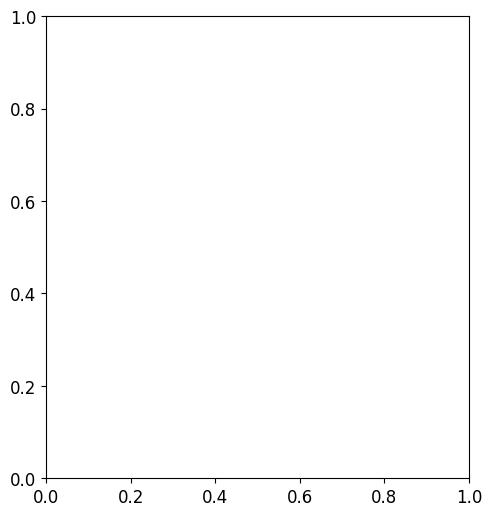

In [93]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Separate features (X) and labels (y)
X = new_data_prepared  # Assuming new_data_prepared contains only features
y = new_data_labels  # Assuming new_data_labels contains the class labels (0 or 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='tanh'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

# Train the model
history = model.fit(X_train, y_train, epochs=400, validation_split=0.2)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("F1 Score: ", f1)

# Plot training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [94]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Separate features (X) and labels (y)
X = new_data_prepared  # Assuming new_data_prepared contains only features
y = new_data_labels  # Assuming new_data_labels contains the class labels (0 or 1)

# Print shapes to verify data integrity
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check unique values in labels
unique_labels = np.unique(y_train)
print("Unique Labels:", unique_labels)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Create a dictionary with class weights
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

print("Class Weights:", class_weights_dict)

# Print shapes of split data
print(f"Training features shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=300, validation_split=0.2, class_weight=class_weights_dict, callbacks=[early_stopping])


# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.4f}".format(recall))

# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("F1 Score: {:.4f}".format(f1))

# Plot training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Features shape: (4513, 58)
Labels shape: (4513,)
Unique Labels: [0 1]
Class Weights: {0: 0.6745142002989537, 1: 1.9325481798715203}
Training features shape: (3610, 58)
Training labels shape: (3610,)
Testing features shape: (903, 58)
Testing labels shape: (903,)


c:\Users\Cipleu\Documents\IULIA\SCOALA\facultate\Year 3 Semester 2\IS\Lab\A_2\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyError: 2

In [95]:
import tensorflow as tf

# Define input shape
input_shape = new_data_num_tr.shape[1]

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

# Print model summary
model.summary()


c:\Users\Cipleu\Documents\IULIA\SCOALA\facultate\Year 3 Semester 2\IS\Lab\A_2\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,825 (54.00 KB)

 Trainable params: 13,825 (54.00 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
from sklearn.compose import ColumnTransformer

X_processed = new_data_prepared
y = new_data_labels

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define the TensorFlow model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model based on the goal (recall or precision)
# Assuming your first name starts with 'A' and you need to improve recall
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

# Train the model
history = model.fit(X_train, y_train, epochs=300, validation_split=0.2)

# Evaluate the model on the training set
train_loss, train_recall = model.evaluate(X_train, y_train)

# Evaluate the model on the test set
test_loss, test_recall = model.evaluate(X_test, y_test)

print("Training Loss:", train_loss)
print("Training Recall:", train_recall)
print("Test Loss:", test_loss)
print("Test Recall:", test_recall)


Epoch 1/300
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5789 - recall_8: 0.2906 - val_loss: 0.3587 - val_recall_8: 0.4971
Epoch 2/300
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3950 - recall_8: 0.5261 - val_loss: 0.3246 - val_recall_8: 0.4211
Epoch 3/300
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3718 - recall_8: 0.5368 - val_loss: 0.3195 - val_recall_8: 0.5789
Epoch 4/300
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3398 - recall_8: 0.6029 - val_loss: 0.3179 - val_recall_8: 0.7018
Epoch 5/300
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3299 - recall_8: 0.6628 - val_loss: 0.3148 - val_recall_8: 0.5497
Epoch 6/300
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3262 - recall_8: 0.6418 - val_loss: 0.3142 - val_recall_8: 0.5380
Epoch 7/300
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3189 - recall_8: 0.6261 - val_loss: 0.3167 - val_recall_8: 0.5965
Epoch 8/300
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3103 - recall_8: 0.6186 - val_loss: 0.3236 - val_r

In [109]:
from sklearn.compose import ColumnTransformer

X_processed = new_data_prepared
y = new_data_labels

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Sample X_train data:", X_train[:5])
print("Sample y_train data:", y_train[:5])
print("Unique labels in y_train:", np.unique(y_train))
print("Class weights:", {0: 1, 1: 10})



# Define the TensorFlow model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model based on the goal (recall or precision)
# Assuming your first name starts with 'A' and you need to improve recall
# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with class weights
# Convert y_train to NumPy array
y_train = y_train.values

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=300, validation_split=0.2,
                    class_weight={0: 1, 1: 10}, callbacks=[early_stopping])



# Evaluate the model on the training set
train_loss, train_recall = model.evaluate(X_train, y_train)

import numpy as np

# Convert y_test to a NumPy array if it's not already
if not isinstance(y_test, np.ndarray):
    y_test = np.array(y_test)

# Ensure that y_test has the correct shape
assert y_test.ndim == 1, "y_test should be a 1D array"

# Evaluate the model on the test set
test_loss, test_recall = model.evaluate(X_test, y_test)



print("Training Loss:", train_loss)
print("Training Recall:", train_recall)
print("Test Loss:", test_loss)
print("Test Recall:", test_recall)


X_train shape: (3610, 58)
y_train shape: (3610,)
Sample X_train data: [[ 7.79991780e-01 -4.31641473e-01  1.88096326e-01 -1.52110164e+00
   1.00110852e+00 -1.13725438e-01 -3.98814930e-02 -3.93868851e-01
  -2.17461345e-01 -2.01037358e-01 -8.37250409e-02 -1.30422773e-01
  -2.35760412e-02 -2.11052621e-02  0.00000000e+00 -1.32135634e-01
  -4.32503894e-01 -2.50565653e-01 -4.39547635e-01 -8.96829015e-02
  -3.87056958e-01 -3.49404620e-01 -2.90074956e-01 -2.24400819e-01
  -3.68439070e-01 -3.42024014e-01 -4.93384938e-01 -4.96088773e-01
  -2.99367616e-01 -3.27664038e-01 -2.43027336e-01 -1.37408485e-01
  -7.14671408e-01 -3.48759488e-01 -1.14550733e-01  6.59699068e-02
   7.79991780e-01 -3.86447845e-01 -5.39958324e-02 -3.72349740e-01
  -9.44003869e-02 -4.57964405e-01  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.0

In [121]:
from sklearn.compose import ColumnTransformer

X_processed = new_data_prepared
y = new_data_labels

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Sample X_train data:", X_train[:5])
print("Sample y_train data:", y_train[:5])
print("Unique labels in y_train:", np.unique(y_train))
print("Class weights:", {0: 1, 1: 10})


# Define the TensorFlow model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model based on the goal (recall or precision)
# Assuming your first name starts with 'A' and you need to improve recall
# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with class weights
# Convert y_train to NumPy array
y_train = y_train.values

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=300, validation_split=0.2,
                    class_weight={0: 0.5, 1: 9.5}, callbacks=[early_stopping])


# Evaluate the model on the training set
train_loss, train_recall = model.evaluate(X_train, y_train)

import numpy as np

# Convert y_test to a NumPy array if it's not already
if not isinstance(y_test, np.ndarray):
    y_test = np.array(y_test)

# Ensure that y_test has the correct shape
assert y_test.ndim == 1, "y_test should be a 1D array"

# Evaluate the model on the test set
test_loss, test_recall = model.evaluate(X_test, y_test)

print("Training Loss:", train_loss)
print("Training Recall:", train_recall)
print("Test Loss:", test_loss)
print("Test Recall:", test_recall)


X_train shape: (3610, 58)
y_train shape: (3610,)
Sample X_train data: [[ 7.79991780e-01 -4.31641473e-01  1.88096326e-01 -1.52110164e+00
   1.00110852e+00 -1.13725438e-01 -3.98814930e-02 -3.93868851e-01
  -2.17461345e-01 -2.01037358e-01 -8.37250409e-02 -1.30422773e-01
  -2.35760412e-02 -2.11052621e-02  0.00000000e+00 -1.32135634e-01
  -4.32503894e-01 -2.50565653e-01 -4.39547635e-01 -8.96829015e-02
  -3.87056958e-01 -3.49404620e-01 -2.90074956e-01 -2.24400819e-01
  -3.68439070e-01 -3.42024014e-01 -4.93384938e-01 -4.96088773e-01
  -2.99367616e-01 -3.27664038e-01 -2.43027336e-01 -1.37408485e-01
  -7.14671408e-01 -3.48759488e-01 -1.14550733e-01  6.59699068e-02
   7.79991780e-01 -3.86447845e-01 -5.39958324e-02 -3.72349740e-01
  -9.44003869e-02 -4.57964405e-01  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.0

# Select and train a model 

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(new_data_prepared, new_data_labels)


In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = new_data.iloc[:5]
some_labels = new_data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", log_reg.predict(some_data_prepared))

Compare against the actual values:

In [ ]:
print("Labels:", list(some_labels))

In [ ]:
some_data_prepared

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

new_data_predictions = log_reg.predict(new_data_prepared)

accuracy = accuracy_score(new_data_labels, new_data_predictions)
precision = precision_score(new_data_labels, new_data_predictions)
recall = recall_score(new_data_labels, new_data_predictions)
f1 = f1_score(new_data_labels, new_data_predictions)
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(new_data_labels, new_data_predictions)

cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Conflict', 'Conflict'])
cm_display.plot()
cm_display.ax_.set_title('Confusion Matrix Logistic Regression')
save_fig('Confusion Matrix Logistic Regression')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest_clf.fit(new_data_prepared, new_data_labels)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

new_data_predictions = forest_clf.predict(new_data_prepared)

accuracy = accuracy_score(new_data_labels, new_data_predictions)
precision = precision_score(new_data_labels, new_data_predictions)
recall = recall_score(new_data_labels, new_data_predictions)
f1 = f1_score(new_data_labels, new_data_predictions)
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(new_data_labels, new_data_predictions)

cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Conflict', 'Conflict'])
cm_display.plot()
cm_display.ax_.set_title('Confusion Matrix Random Forest')
save_fig('Confusion Matrix Random Forest')


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(new_data_prepared, new_data_labels)


In [ ]:
new_data_predictions = tree_clf.predict(new_data_prepared)
accuracy = accuracy_score(new_data_labels, new_data_predictions)
precision = precision_score(new_data_labels, new_data_predictions)
recall = recall_score(new_data_labels, new_data_predictions)
f1 = f1_score(new_data_labels, new_data_predictions)
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Scores of 1 may be an indicator for overfitting.

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(new_data_labels, new_data_predictions)

cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Conflict', 'Conflict'])
cm_display.plot()
cm_display.ax_.set_title('Confusion Matrix Decision Tree')
save_fig('Confusion Matrix Decision Tree')


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(new_data_prepared, new_data_labels)

In [ ]:
new_data_predictions = knn_clf.predict(new_data_prepared)
accuracy = accuracy_score(new_data_labels, new_data_predictions)
precision = precision_score(new_data_labels, new_data_predictions)
recall = recall_score(new_data_labels, new_data_predictions)
f1 = f1_score(new_data_labels, new_data_predictions)
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(new_data_labels, new_data_predictions)

cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Conflict', 'Conflict'])
cm_display.plot()
cm_display.ax_.set_title('Confusion Matrix K Neighbors')
save_fig('Confusion Matrix K Neighbors')


In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(new_data_prepared, new_data_labels)

In [ ]:
new_data_predictions = svm_clf.predict(new_data_prepared)
accuracy = accuracy_score(new_data_labels, new_data_predictions)
precision = precision_score(new_data_labels, new_data_predictions)
recall = recall_score(new_data_labels, new_data_predictions)
f1 = f1_score(new_data_labels, new_data_predictions)
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(new_data_labels, new_data_predictions)

cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Conflict', 'Conflict'])
cm_display.plot()
cm_display.ax_.set_title('Confusion Matrix C-Support Vector')
save_fig('Confusion Matrix C-Support Vector')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(new_data_prepared, new_data_labels)

In [ ]:
new_data_predictions = gb_clf.predict(new_data_prepared)
accuracy = accuracy_score(new_data_labels, new_data_predictions)
precision = precision_score(new_data_labels, new_data_predictions)
recall = recall_score(new_data_labels, new_data_predictions)
f1 = f1_score(new_data_labels, new_data_predictions)
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(new_data_labels, new_data_predictions)

cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Conflict', 'Conflict'])
cm_display.plot()
cm_display.ax_.set_title('Confusion Matrix Gradient Boosting')
save_fig('Confusion Matrix Gradient Boosting')

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(new_data_prepared, new_data_labels)

In [ ]:
new_data_predictions = nb_clf.predict(new_data_prepared)
accuracy = accuracy_score(new_data_labels, new_data_predictions)
precision = precision_score(new_data_labels, new_data_predictions)
recall = recall_score(new_data_labels, new_data_predictions)
f1 = f1_score(new_data_labels, new_data_predictions)
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(new_data_labels, new_data_predictions)

cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Conflict', 'Conflict'])
cm_display.plot()
cm_display.ax_.set_title('Confusion Matrix Gaussian Naive Bayes')
save_fig('Confusion Matrix Gaussian Naive Bayes')


# Fine-tune your model

In [ ]:
from sklearn.model_selection import cross_val_score

accuracy_scores = cross_val_score(tree_clf, new_data_prepared, new_data_labels, scoring="accuracy", cv=10)
precision_scores = cross_val_score(tree_clf, new_data_prepared, new_data_labels, scoring="precision_weighted", cv=10)
recall_scores = cross_val_score(tree_clf, new_data_prepared, new_data_labels, scoring="recall_weighted", cv=10)
f1_scores = cross_val_score(tree_clf, new_data_prepared, new_data_labels, scoring="f1_weighted", cv=10)


In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

print("Accuracy Scores:")
display_scores(accuracy_scores)

print("\nPrecision Scores:")
display_scores(precision_scores)

print("\nRecall Scores:")
display_scores(recall_scores)

print("\nF1 Scores:")
display_scores(f1_scores)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg_accuracy_scores = cross_val_score(log_reg, new_data_prepared, new_data_labels, scoring="accuracy", cv=10)

log_reg_precision_scores = cross_val_score(log_reg, new_data_prepared, new_data_labels, scoring="precision_weighted", cv=10)

log_reg_recall_scores = cross_val_score(log_reg, new_data_prepared, new_data_labels, scoring="recall_weighted", cv=10)

log_reg_f1_scores = cross_val_score(log_reg, new_data_prepared, new_data_labels, scoring="f1_weighted", cv=10)

print("Accuracy Scores:")
display_scores(log_reg_accuracy_scores)

print("\nPrecision Scores:")
display_scores(log_reg_precision_scores)

print("\nRecall Scores:")
display_scores(log_reg_recall_scores)

print("\nF1 Scores:")
display_scores(log_reg_f1_scores)


**Note**: we specify `n_estimators=10` to avoid a warning about the fact that the default value is going to change to 100 in Scikit-Learn 0.22.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clf.fit(new_data_prepared, new_data_labels)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

new_data_predictions = forest_clf.predict(new_data_prepared)

accuracy = accuracy_score(new_data_labels, new_data_predictions)
precision = precision_score(new_data_labels, new_data_predictions)
recall = recall_score(new_data_labels, new_data_predictions)
f1 = f1_score(new_data_labels, new_data_predictions)
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(new_data_labels, new_data_predictions)

cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Conflict', 'Conflict'])
cm_display.plot()
cm_display.ax_.set_title('Confusion Matrix Random Forest')
save_fig('Confusion Matrix Random Forest')


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

forest_accuracy_scores = cross_val_score(forest_clf, new_data_prepared, new_data_labels, scoring="accuracy", cv=10)

forest_precision_scores = cross_val_score(forest_clf, new_data_prepared, new_data_labels, scoring="precision_weighted", cv=10)

forest_recall_scores = cross_val_score(forest_clf, new_data_prepared, new_data_labels, scoring="recall_weighted", cv=10)

forest_f1_scores = cross_val_score(forest_clf, new_data_prepared, new_data_labels, scoring="f1_weighted", cv=10)

print("Accuracy Scores:")
display_scores(forest_accuracy_scores)

print("\nPrecision Scores:")
display_scores(forest_precision_scores)

print("\nRecall Scores:")
display_scores(forest_recall_scores)

print("\nF1 Scores:")
display_scores(forest_f1_scores)


In [ ]:
scores = cross_val_score(log_reg, new_data_prepared, new_data_labels, scoring="accuracy", cv=10)
pd.Series(scores).describe()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Create RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring=scoring, refit='accuracy', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(new_data_prepared, new_data_labels)


The best hyperparameter combination found:

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

Let's look at the score of each hyperparameter combination tested during the grid search:

In [ ]:
cvres = grid_search.cv_results_

accuracy_scores = [(mean_score, params) for mean_score, params in zip(cvres["mean_test_accuracy"], cvres["params"])]
precision_scores = [(mean_score, params) for mean_score, params in zip(cvres["mean_test_precision"], cvres["params"])]
recall_scores = [(mean_score, params) for mean_score, params in zip(cvres["mean_test_recall"], cvres["params"])]
f1_scores = [(mean_score, params) for mean_score, params in zip(cvres["mean_test_f1"], cvres["params"])]

accuracy_scores.sort(reverse=True)
precision_scores.sort(reverse=True)
recall_scores.sort(reverse=True)
f1_scores.sort(reverse=True)

print("Accuracy:")
for mean_score, params in accuracy_scores:
    print("Accuracy:", mean_score, "Params:", params)

print("\nPrecision:")
for mean_score, params in precision_scores:
    print("Precision:", mean_score, "Params:", params)

print("\nRecall:")
for mean_score, params in recall_scores:
    print("Recall:", mean_score, "Params:", params)

print("\nF1 Score:")
for mean_score, params in f1_scores:
    print("F1 Score:", mean_score, "Params:", params)


Accuracy: 0.8420127046332379 Params: {'max_features': 6, 'n_estimators': 30}
This line indicates that the model achieved an accuracy of approximately 84.2% with 'max_features' set to 6 and 'n_estimators' set to 30.

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

# Define the parameter distributions
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
}

# Create RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

# Create RandomizedSearchCV
rnd_search = RandomizedSearchCV(forest_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
# Fit the randomized search to the data
rnd_search.fit(new_data_prepared, new_data_labels)

# Display the best parameters and best estimator
print("Best parameters:", rnd_search.best_params_)
print("Best estimator:", rnd_search.best_estimator_)

# Get the best estimator
best_forest_clf = rnd_search.best_estimator_

# Use cross-validation to evaluate the best estimator
from sklearn.model_selection import cross_val_score

# Accuracy scores
accuracy_scores = cross_val_score(best_forest_clf, new_data_prepared, new_data_labels, scoring="accuracy", cv=5)

# Precision scores
precision_scores = cross_val_score(best_forest_clf, new_data_prepared, new_data_labels, scoring="precision_weighted", cv=5)

# Recall scores
recall_scores = cross_val_score(best_forest_clf, new_data_prepared, new_data_labels, scoring="recall_weighted", cv=5)

# F1 scores
f1_scores = cross_val_score(best_forest_clf, new_data_prepared, new_data_labels, scoring="f1_weighted", cv=5)

# Display scores
print("Accuracy Scores:")
display_scores(accuracy_scores)

print("\nPrecision Scores:")
display_scores(precision_scores)

print("\nRecall Scores:")
display_scores(recall_scores)

print("\nF1 Scores:")
display_scores(f1_scores)



In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Params:", params)
    print("Mean Test Score:", mean_score)
    
    # Create a new RandomForestClassifier with the current parameters
    forest_clf = RandomForestClassifier(**params, random_state=42)
    
    # Perform cross-validation to get predictions
    y_pred = cross_val_predict(forest_clf, new_data_prepared, new_data_labels, cv=5)
    
    # Calculate and print accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(new_data_labels, y_pred)
    precision = precision_score(new_data_labels, y_pred, average='weighted')
    recall = recall_score(new_data_labels, y_pred, average='weighted')
    f1 = f1_score(new_data_labels, y_pred, average='weighted')
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = ["messages_max_per_messages_mean", "nr_commits1_per_total", "deleted_files_per_total", "deleted_lines_per_added_lines", "renamed_lines_per_total"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

# Convert feature_importances to a regular Python list
feature_importances_list = list(feature_importances)

# Zip the lists together
feature_importance_attr = list(zip(feature_importances_list, attributes))

# Sort by feature importances (in descending order)
sorted_feature_importance_attr = sorted(feature_importance_attr, key=lambda x: x[0], reverse=True)

# Print the sorted feature importances and their corresponding attributes
for importance, attribute in sorted_feature_importance_attr:
    print(importance, attribute)

Prints the importance of each feature along with its attribute name. The more important features are at the top of the list, and less important features are towards the bottom.
Some observations: the features "pr", "nr files", "nr commits2", etc., are the most important features for the model, features like "deleted_lines_per_added_lines" and "nr_commits1_per_total" have relatively low importance values, and some features, like "nan", "copied files", and some numerical values at the bottom, have zero or almost zero importance, indicating they might not contribute much to the model's predictive power.

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("conflict", axis=1)
y_test = strat_test_set["conflict"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions)
recall = recall_score(y_test, final_predictions)
f1 = f1_score(y_test, final_predictions)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

We can compute a 95% confidence interval for the test RMSE:

In [ ]:
from scipy import stats

In [ ]:
from sklearn.model_selection import cross_val_score

# Compute cross-validated scores for accuracy
accuracy_scores = cross_val_score(final_model, X_test_prepared, y_test, cv=10, scoring="accuracy")

# Compute confidence interval for accuracy
confidence = 0.95
accuracy_mean = accuracy_scores.mean()
accuracy_std = accuracy_scores.std()
m = len(accuracy_scores)

import scipy.stats as stats
accuracy_interval = stats.t.interval(confidence, m - 1, loc=accuracy_mean, scale=accuracy_std / np.sqrt(m))

print("Accuracy Mean:", accuracy_mean)
print("Accuracy Confidence Interval:", accuracy_interval)

# Repeat the same for other metrics like precision, recall, and F1 score
precision_scores = cross_val_score(final_model, X_test_prepared, y_test, cv=10, scoring="precision_weighted")
precision_mean = precision_scores.mean()
precision_std = precision_scores.std()
precision_interval = stats.t.interval(confidence, m - 1, loc=precision_mean, scale=precision_std / np.sqrt(m))

recall_scores = cross_val_score(final_model, X_test_prepared, y_test, cv=10, scoring="recall_weighted")
recall_mean = recall_scores.mean()
recall_std = recall_scores.std()
recall_interval = stats.t.interval(confidence, m - 1, loc=recall_mean, scale=recall_std / np.sqrt(m))

f1_scores = cross_val_score(final_model, X_test_prepared, y_test, cv=10, scoring="f1_weighted")
f1_mean = f1_scores.mean()
f1_std = f1_scores.std()
f1_interval = stats.t.interval(confidence, m - 1, loc=f1_mean, scale=f1_std / np.sqrt(m))

print("Precision Mean:", precision_mean)
print("Precision Confidence Interval:", precision_interval)

print("Recall Mean:", recall_mean)
print("Recall Confidence Interval:", recall_interval)

print("F1 Score Mean:", f1_mean)
print("F1 Score Confidence Interval:", f1_interval)


We could compute the interval manually like this:

In [ ]:
from sklearn.model_selection import cross_val_score

# Compute cross-validated scores for accuracy
accuracy_scores = cross_val_score(final_model, X_test_prepared, y_test, cv=10, scoring="accuracy")

# Compute mean and standard deviation of accuracy scores
accuracy_mean = accuracy_scores.mean()
accuracy_std = accuracy_scores.std()
m = len(accuracy_scores)

# Compute the t-score and margin of error for accuracy
confidence = 0.95
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * accuracy_std / np.sqrt(m)

# Compute the confidence interval for accuracy
accuracy_lower_bound = accuracy_mean - tmargin
accuracy_upper_bound = accuracy_mean + tmargin

print("Accuracy Mean:", accuracy_mean)
print("Accuracy Confidence Interval:", (accuracy_lower_bound, accuracy_upper_bound))

# Repeat the same for other metrics like precision, recall, and F1 score
precision_scores = cross_val_score(final_model, X_test_prepared, y_test, cv=10, scoring="precision_weighted")
precision_mean = precision_scores.mean()
precision_std = precision_scores.std()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * precision_std / np.sqrt(m)
precision_lower_bound = precision_mean - tmargin
precision_upper_bound = precision_mean + tmargin

print("Precision Mean:", precision_mean)
print("Precision Confidence Interval:", (precision_lower_bound, precision_upper_bound))

recall_scores = cross_val_score(final_model, X_test_prepared, y_test, cv=10, scoring="recall_weighted")
recall_mean = recall_scores.mean()
recall_std = recall_scores.std()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * recall_std / np.sqrt(m)
recall_lower_bound = recall_mean - tmargin
recall_upper_bound = recall_mean + tmargin

print("Recall Mean:", recall_mean)
print("Recall Confidence Interval:", (recall_lower_bound, recall_upper_bound))

f1_scores = cross_val_score(final_model, X_test_prepared, y_test, cv=10, scoring="f1_weighted")
f1_mean = f1_scores.mean()
f1_std = f1_scores.std()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * f1_std / np.sqrt(m)
f1_lower_bound = f1_mean - tmargin
f1_upper_bound = f1_mean + tmargin

print("F1 Score Mean:", f1_mean)
print("F1 Score Confidence Interval:", (f1_lower_bound, f1_upper_bound))


Alternatively, we could use a z-scores rather than t-scores:

In [ ]:
from sklearn.model_selection import cross_val_score

# Compute cross-validated scores for accuracy
accuracy_scores = cross_val_score(final_model, X_test_prepared, y_test, cv=10, scoring="accuracy")

# Compute mean and standard deviation of accuracy scores
accuracy_mean = accuracy_scores.mean()
accuracy_std = accuracy_scores.std()
m = len(accuracy_scores)

# Compute the z-score and margin of error for accuracy
confidence = 0.95
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * accuracy_std / np.sqrt(m)

# Compute the confidence interval for accuracy
accuracy_lower_bound = accuracy_mean - zmargin
accuracy_upper_bound = accuracy_mean + zmargin

print("Accuracy Mean:", accuracy_mean)
print("Accuracy Confidence Interval:", (accuracy_lower_bound, accuracy_upper_bound))

# Repeat the same for other metrics like precision, recall, and F1 score
precision_scores = cross_val_score(final_model, X_test_prepared, y_test, cv=10, scoring="precision_weighted")
precision_mean = precision_scores.mean()
precision_std = precision_scores.std()
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * precision_std / np.sqrt(m)
precision_lower_bound = precision_mean - zmargin
precision_upper_bound = precision_mean + zmargin

print("Precision Mean:", precision_mean)
print("Precision Confidence Interval:", (precision_lower_bound, precision_upper_bound))

recall_scores = cross_val_score(final_model, X_test_prepared, y_test, cv=10, scoring="recall_weighted")
recall_mean = recall_scores.mean()
recall_std = recall_scores.std()
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * recall_std / np.sqrt(m)
recall_lower_bound = recall_mean - zmargin
recall_upper_bound = recall_mean + zmargin

print("Recall Mean:", recall_mean)
print("Recall Confidence Interval:", (recall_lower_bound, recall_upper_bound))

f1_scores = cross_val_score(final_model, X_test_prepared, y_test, cv=10, scoring="f1_weighted")
f1_mean = f1_scores.mean()
f1_std = f1_scores.std()
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * f1_std / np.sqrt(m)
f1_lower_bound = f1_mean - zmargin
f1_upper_bound = f1_mean + zmargin

print("F1 Score Mean:", f1_mean)
print("F1 Score Confidence Interval:", (f1_lower_bound, f1_upper_bound))


# Extra material

## A full pipeline with both preparation and prediction

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LogisticRegression())
    ])

full_pipeline_with_predictor.fit(new_data, new_data_labels)
full_pipeline_with_predictor.predict(some_data)

## Model persistence using joblib

In [ ]:
my_model = full_pipeline_with_predictor

In [ ]:
#from sklearn.externals import joblib
import joblib

joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

## Example SciPy distributions for `RandomizedSearchCV`

In [ ]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

# Exercise solutions

## 1.

Question: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = [
    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100],
     'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
]

svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=4)
grid_search.fit(new_data_prepared, new_data_labels)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [ ]:
best_accuracy = grid_search.best_score_
y_true = grid_search.best_estimator_.predict(new_data_prepared)
y_pred = new_data_labels

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Best Accuracy:", best_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(new_data_labels, new_data_predictions)

cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Conflict', 'Conflict'])
cm_display.plot()
cm_display.ax_.set_title('Confusion Matrix Grid Search')
save_fig('Confusion Matrix Grid Search')


That's much worse than the `RandomForestRegressor`. Let's check the best hyperparameters found:

In [ ]:
grid_search.best_params_

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

## 2.

Question: Try replacing `GridSearchCV` with `RandomizedSearchCV`.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

param_grid = [
    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100],
     'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
]

svm_classifier = SVC()
rnd_search = RandomizedSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=4)
rnd_search.fit(new_data_prepared, new_data_labels)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [ ]:
best_accuracy = rnd_search.best_score_
y_true = rnd_search.best_estimator_.predict(new_data_prepared)
y_pred = new_data_labels

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Best Accuracy:", best_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(new_data_labels, new_data_predictions)

cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Conflict', 'Conflict'])
cm_display.plot()
cm_display.ax_.set_title('Confusion Matrix Randomized Search')
save_fig("Confusion Matrix Randomized Search")

Now this is much closer to the performance of the `RandomForestRegressor` (but not quite there yet). Let's check the best hyperparameters found:

In [ ]:
rnd_search.best_params_

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Let's look at the exponential distribution we used, with `scale=1.0`. Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution, you can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.

In [ ]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The distribution we used for `C` looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is:

In [ ]:
from scipy.stats import reciprocal

reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

## 3.

Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

Note: this feature selector assumes that you have already computed the feature importances somehow (for example using a `RandomForestRegressor`). You may be tempted to compute them directly in the `TopFeatureSelector`'s `fit()` method, however this would likely slow down grid/randomized search since the feature importances would have to be computed for every hyperparameter combination (unless you implement some sort of cache).

Let's define the number of top features we want to keep:

In [ ]:
k = 5

Now let's look for the indices of the top k features:

In [ ]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

In [ ]:
np.array(attributes)[top_k_feature_indices]

Let's double check that these are indeed the top k features:

In [ ]:
sorted_feature_importance_attr = sorted(zip(feature_importances_list, attributes), reverse=True, key=lambda x: x[0])

for importance, attribute in sorted_feature_importance_attr:
    print(importance, attribute)


Looking good... Now let's create a new pipeline that runs the previously defined preparation pipeline, and adds top k feature selection:

In [ ]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [ ]:
new_data_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(new_data)

Let's look at the features of the first 3 instances:

In [ ]:
new_data_prepared_top_k_features[0:3]

Now let's double check that these are indeed the top k features:

In [ ]:
new_data_prepared[0:3, top_k_feature_indices]

Works great!  :)

## 4.

Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [ ]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVC(**rnd_search.best_params_))
])

In [ ]:
prepare_select_and_predict_pipeline.fit(new_data, new_data_labels)

Let's try the full pipeline on a few instances:

In [ ]:
some_data = new_data.iloc[:4]
some_labels = new_data_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Well, the full pipeline seems to work fine. Of course, the predictions are not fantastic: they would be better if we used the best `RandomForestRegressor` that we found earlier, rather than the best `SVR`.

## 5.

Question: Automatically explore some preparation options using `GridSearchCV`.

In [ ]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='accuracy', verbose=2, n_jobs=4)
grid_search_prep.fit(new_data, new_data_labels)

In [ ]:
grid_search_prep.best_params_

The best imputer strategy is `mean` and apparently almost all features are useful (30 out of 38).

Congratulations! You already know quite a lot about Machine Learning. :)